## Анализ деятельности краудсорсинговой платформы Kiva

In [172]:
import os
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

import math
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

### 1. Выгрузка данных и первичный анализ
### 1.1. Пропущенные значения в данных

In [173]:
df_kiva_loans = pd.read_csv('kiva_loans.csv')
df_mpi = pd.read_csv('kiva_mpi_region_locations.csv')

In [174]:
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


<Axes: >

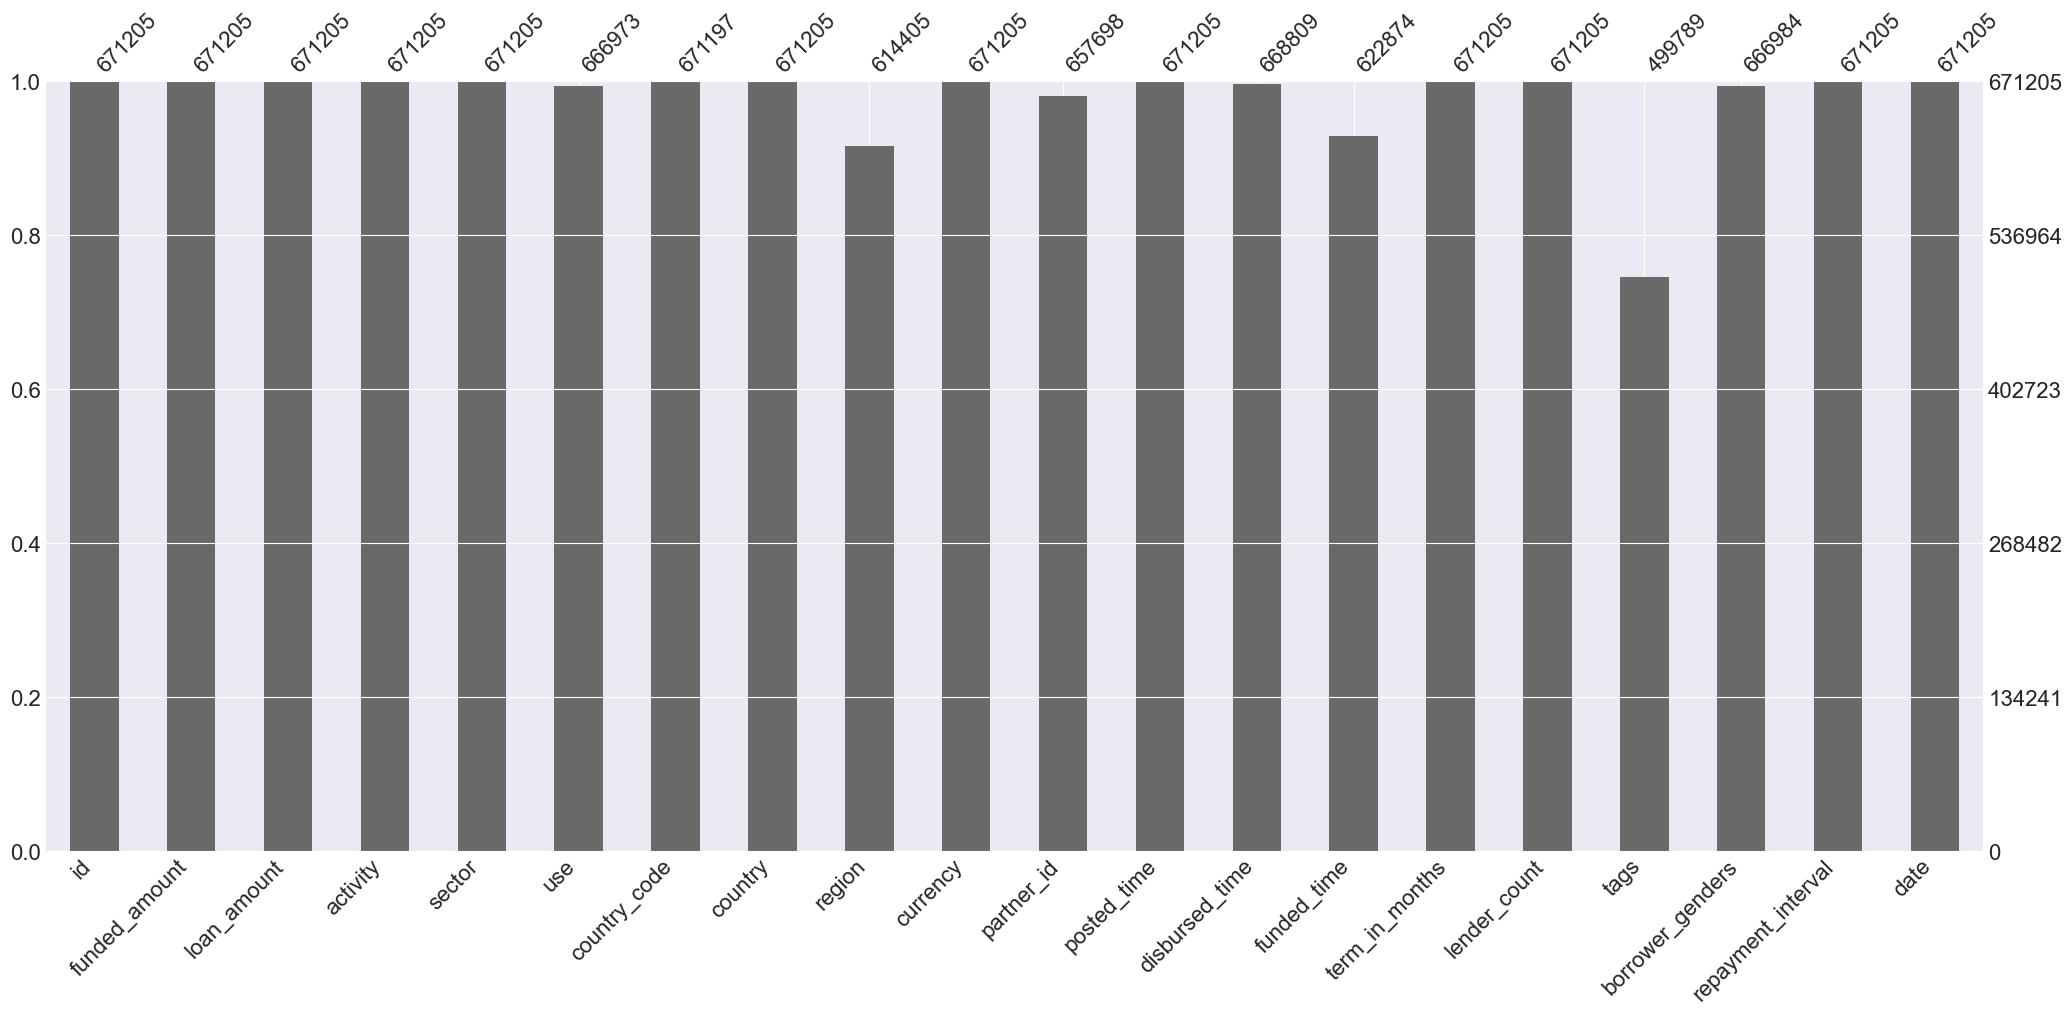

In [175]:
msno.bar(df_kiva_loans)

<Axes: >

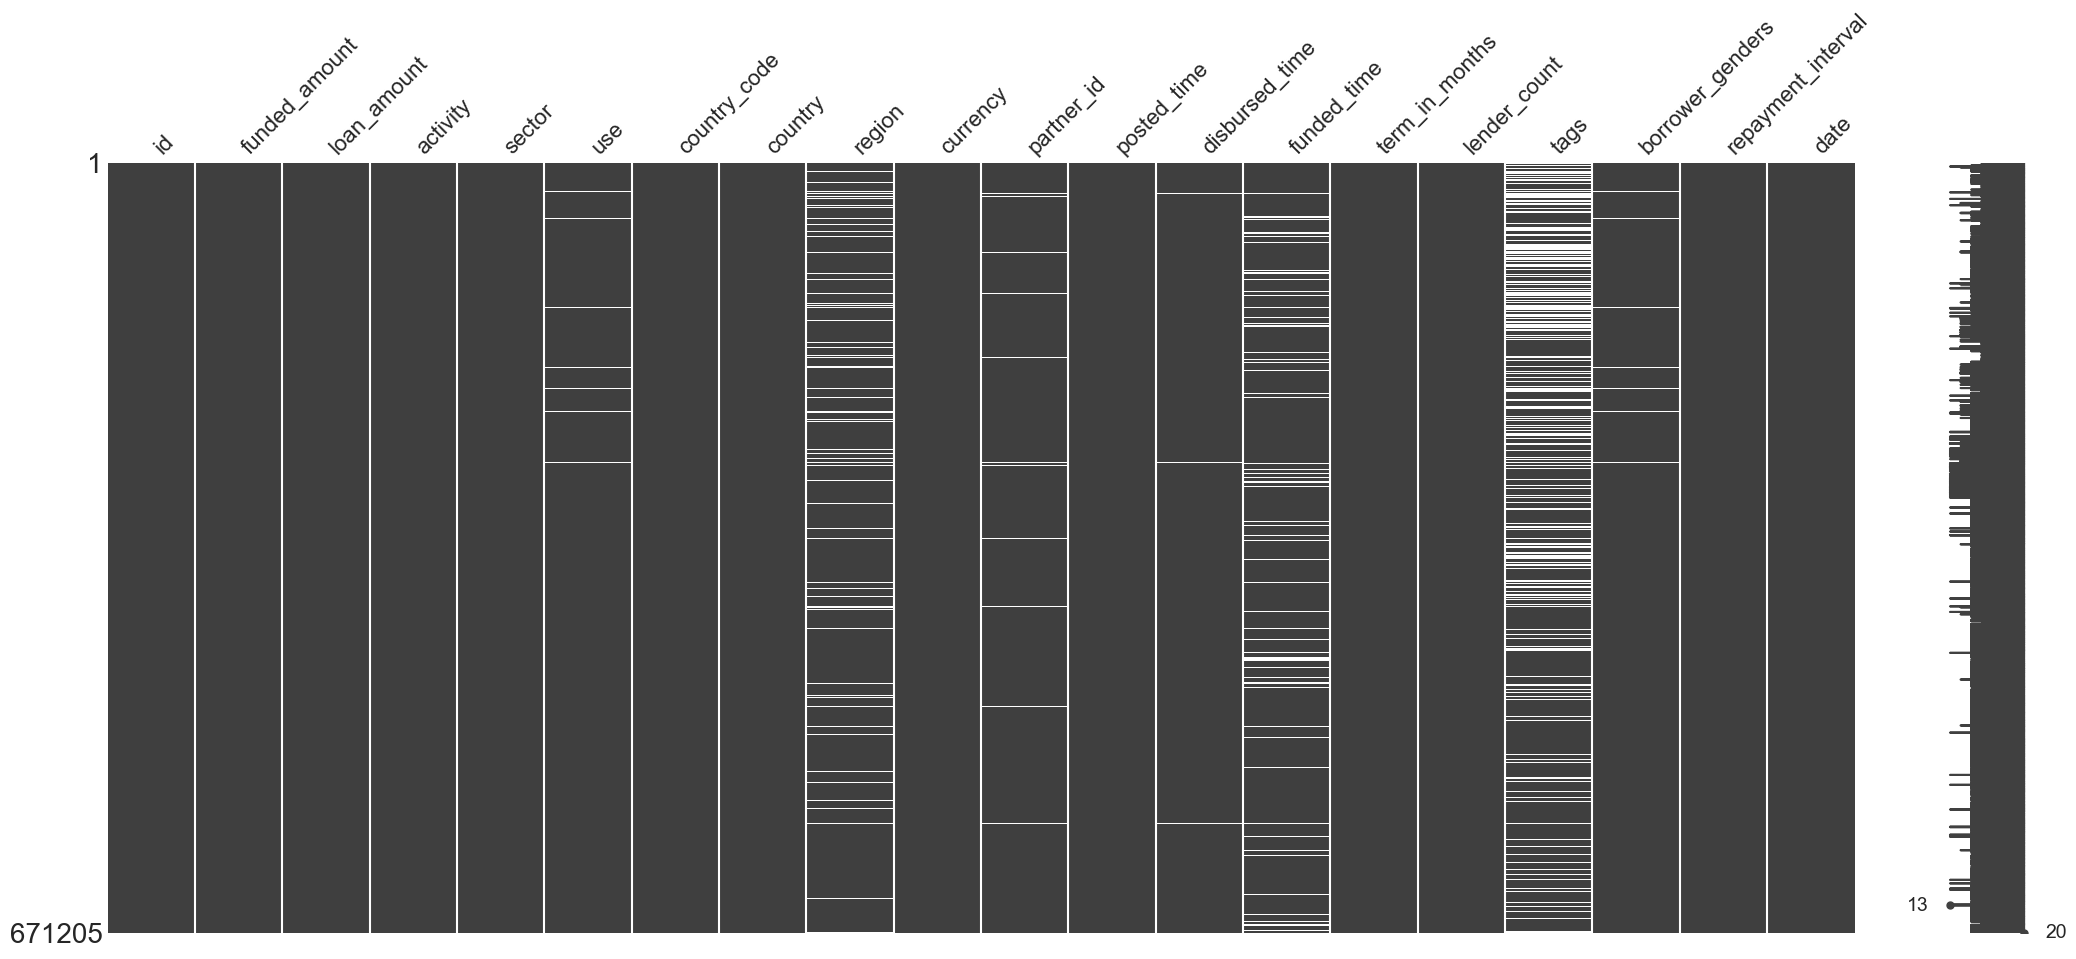

In [176]:
msno.matrix(df_kiva_loans)

#### Столбец тэгов имеет много пропущенных значений. Также столбец с датой, когда запрашиваемая сумма была собрана на платформе kiva, имеет около 8% пропусков. Это может означать либо то, что  сумма пока не собрана, либо то, что она не была отображена в выгрузке корректно.

### 1.2. Типы данных в таблице

In [177]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [178]:
df_kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [179]:
df_kiva_loans.describe(include='object')

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


* В датасете содержатся данные о займах в 87 страннах мир
* Наибольшее число зймов наблюдается в Филлипинах
* Наиболее популярная категория - Сельское хозяйство
* Наблюдается очень широкий разброс значений займов
* Уникальных дат 1298 -> Kiva обрабатывает по 500+ заявок в день

### 2. Пользователи Kiva
### 2.1. Из каких стран эти люди?

Чтобы получить наиболее статистически значимые результаты, оставим только те страны, которые составляют не менее 0.5% сообщества Kiva

In [180]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True) > 0.005]
list_countries = list(countries.index)

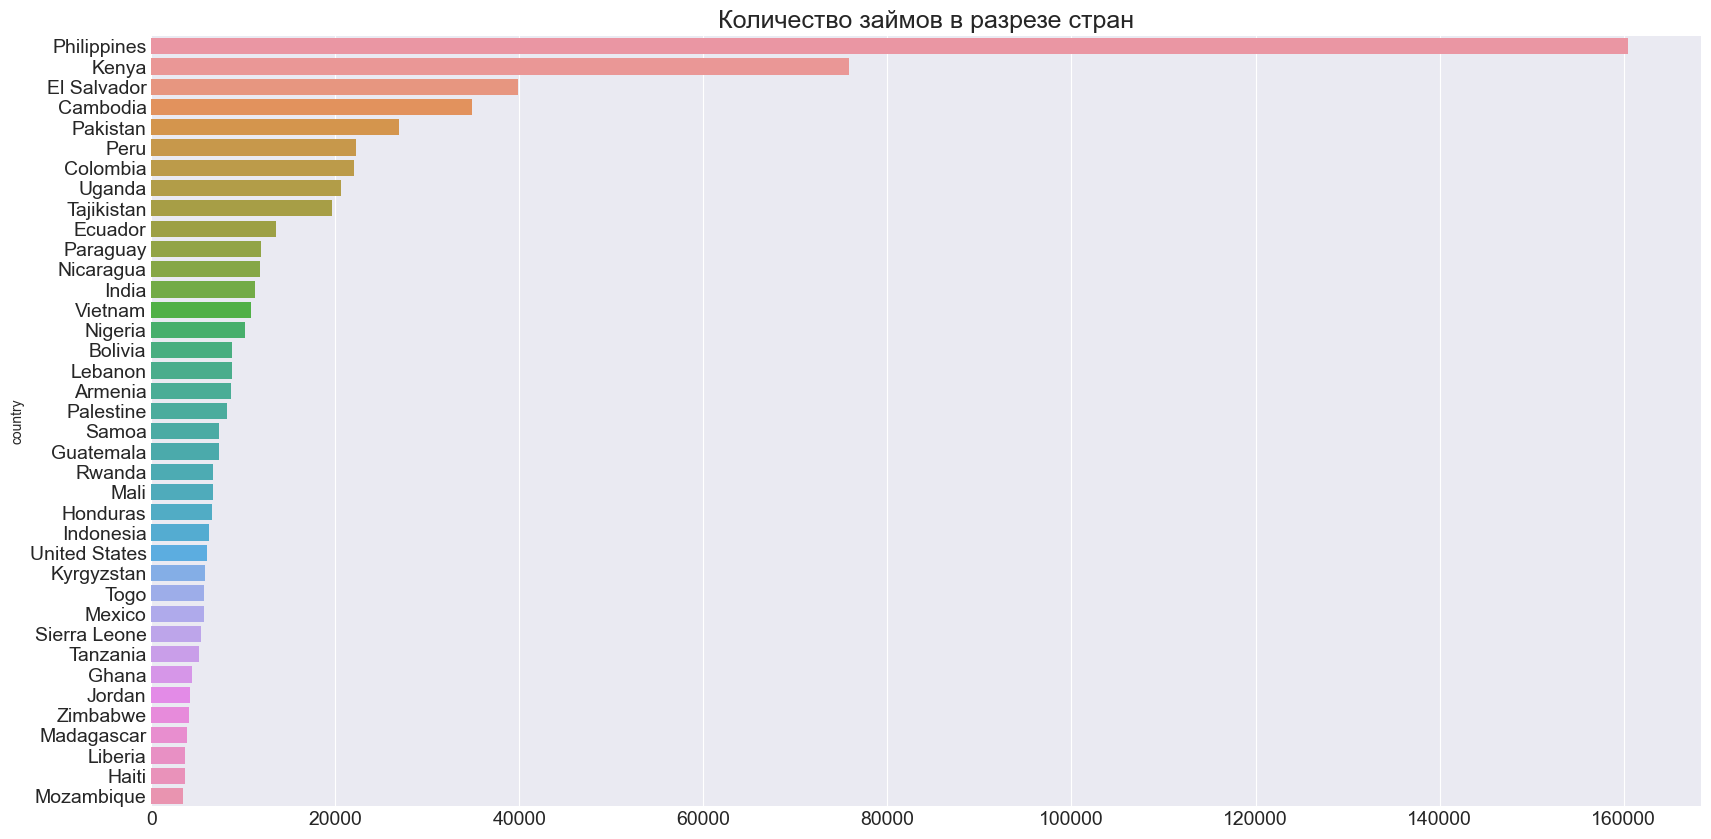

In [181]:
plt.figure(figsize=(20, 10))
plt.title('Количество займов в разрезе стран', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values)
plt.show()

* Чуть менее четверти всех займов приходится на Филлипины (160000+)
    * Вероятно, тут широко распространены краткосрочные и небольшие займы
* Наблюдается большое количество африканских стран (Кения, Нигерия, Гана, Мали)
* Не наблюдается ни одной страны из ЕС
    * Удивительно присутствие США в этом списке

##### Сгруппируем страны по макрорегионам

In [182]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [183]:
df_mpi_grouped = df_mpi.groupby(['ISO', 'country', 'world_region'])['MPI'].mean().fillna(0).reset_index()
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')
regions = df_kiva_loans['world_region'].value_counts()
regions_list = regions.index.to_list()

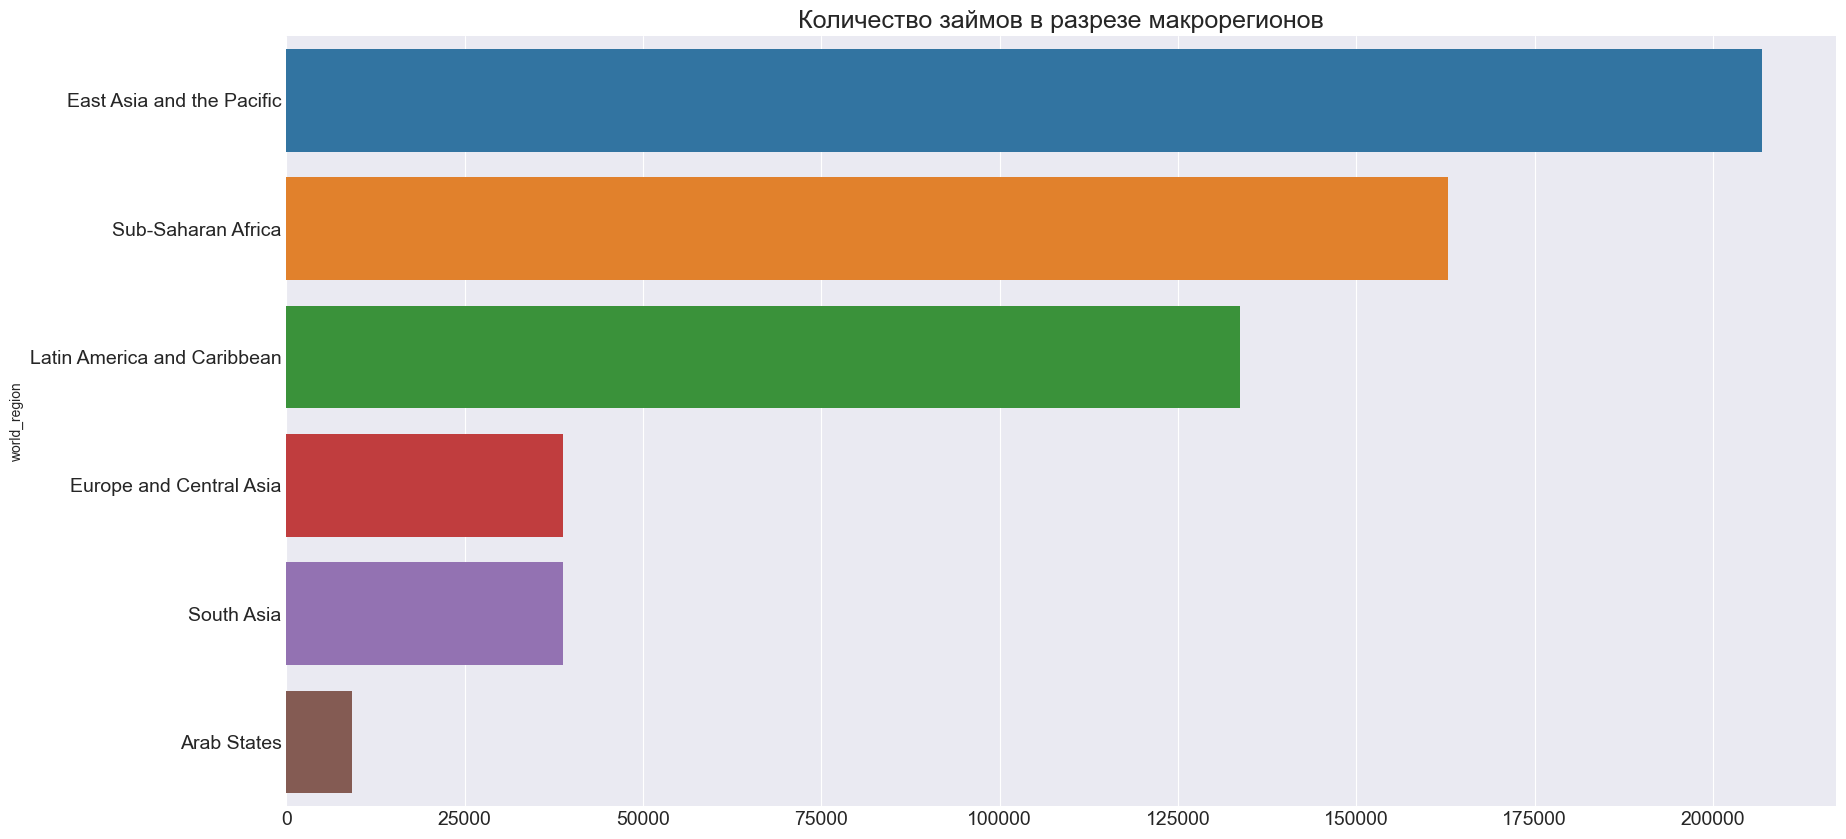

In [184]:
plt.figure(figsize=(20, 10))
plt.title('Количество займов в разрезе макрорегионов', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=regions.index, x=regions.values)
plt.show()

* Очевидно наличие 3-х "лидеров" и 3-х "аутсайдеров" по количеству выданных займов
    * Либо в регионах-"аутсайдерах" Kiva не успела расширить свое присутствие, либо регионы, в целом, более богатые

*Наличие Арабских эмиратов сведетельствует о втором предположении

### 2.2. Гендерная составляющая заёмщиков

<Axes: ylabel='count'>

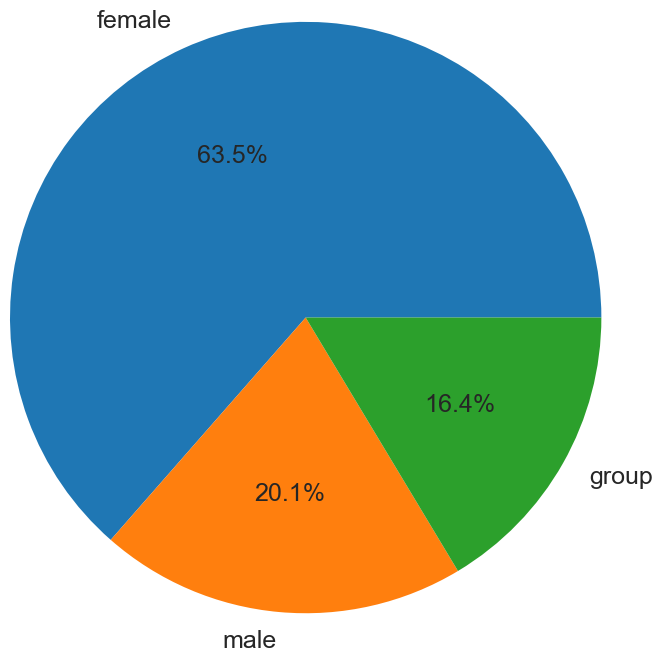

In [185]:
df_kiva_loans.borrower_genders = [elem if elem in ['male', 'female'] else 'group' for elem in df_kiva_loans.borrower_genders] 
df_kiva_loans.borrower_genders.value_counts().plot.pie(fontsize=18, labeldistance=1.1, autopct='%1.1f%%', radius=2)

* Подавляющее большинство заемщиков - женщины.
    * Вероятнее всего, они получают заемы для развития собственного дела в странах, где традиционно женщинам это сделать крайне тяжело

##### В каких странах среди заемщиков преобладают женщины?

In [186]:
df_gender_by_country = df_kiva_loans[df_kiva_loans.country.isin(countries.index.to_list())]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
        .count().groupby(level=0).apply(lambda x: 100*x/x.sum())\
            .unstack('borrower_genders').fillna(0).sort_values(by='female')

df_gender_by_country.index = [elem[0] for elem in df_gender_by_country.index]


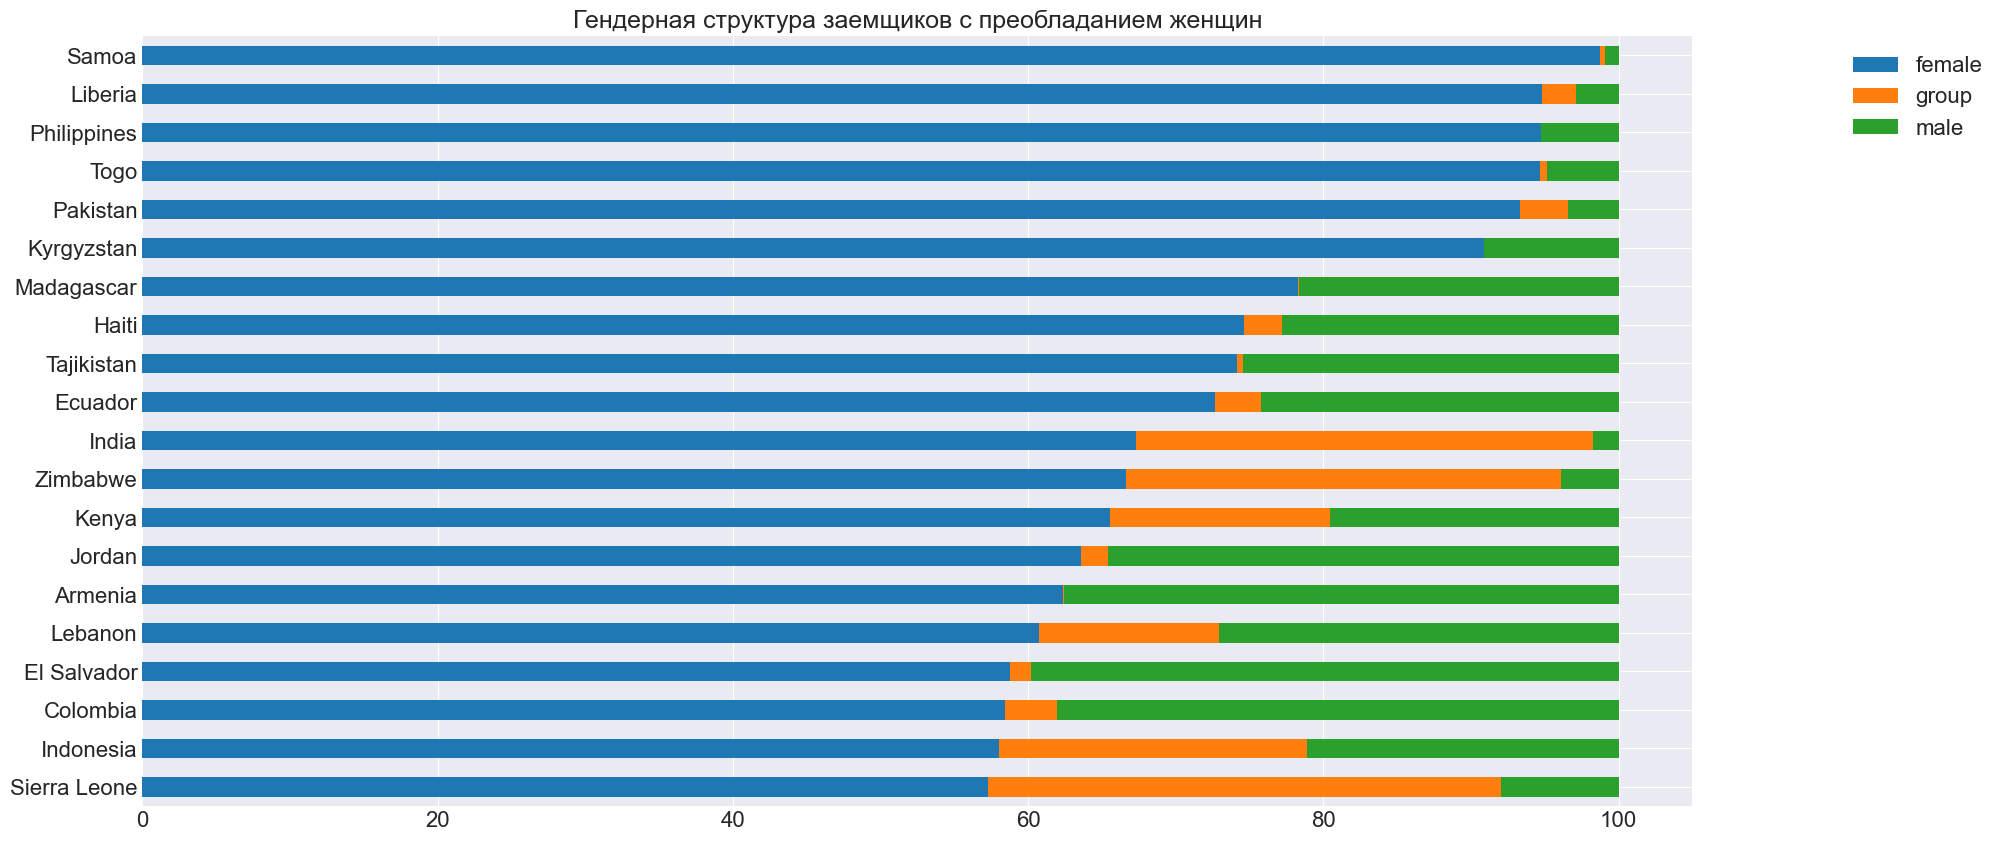

In [187]:
plot = df_gender_by_country[-20::].plot.barh(
    figsize=(20, 10),
    fontsize=16,
    stacked=True,
    title='Гендерная структура заемщиков с преобладанием женщин',
)
plot.title.set_size(18)
plot.legend(loc=1,  bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

##### В каких странах среди заемщиков преобладают мужчины?

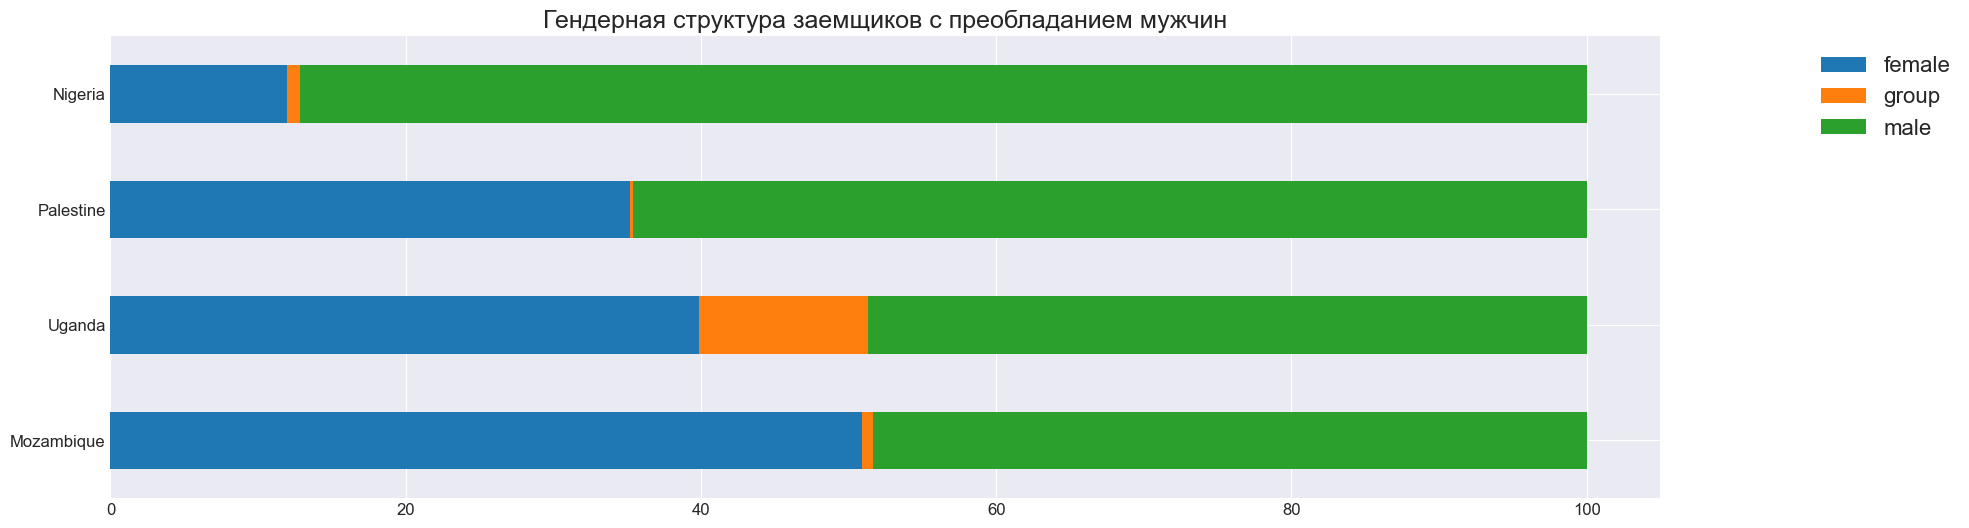

In [188]:
plot = df_gender_by_country.sort_values(by='male')[-4::].plot.barh(
    figsize=(20, 6),
    fontsize=16,
    stacked=True,
    title='Гендерная структура заемщиков с преобладанием мужчин',
)
plot.title.set_size(18)
plot.legend(loc=1,  bbox_to_anchor=(1.2, 1), fontsize=16)
plt.tick_params(labelsize=12)
plot.set(ylabel=None, xlabel=None)
plt.show()

##### В каких странах группы людей чаще всего берут займы?

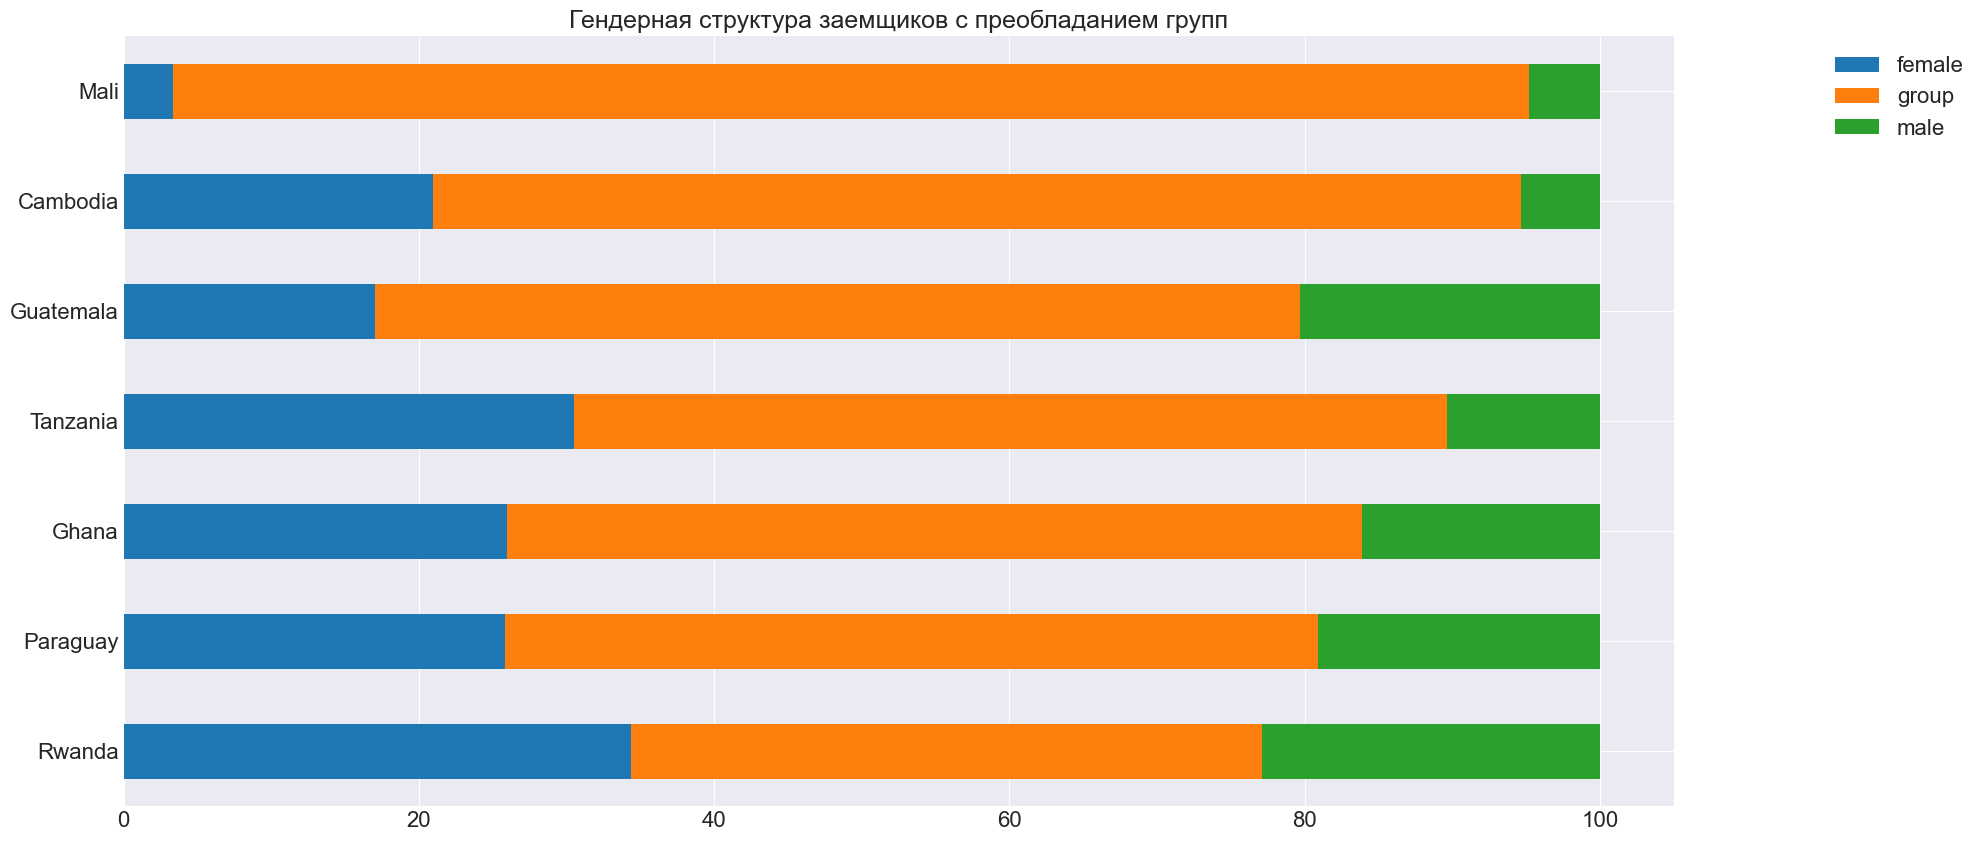

In [189]:
plot = df_gender_by_country.sort_values(by='group')[-7::].plot.barh(
    figsize=(20, 10),
    fontsize=16,
    stacked=True,
    title='Гендерная структура заемщиков с преобладанием групп',
)
plot.title.set_size(18)
plot.legend(loc=1,  bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

### 2.3. Количество займов
#### Для чего людям нужны кредиты и какие суммы им нужны?

### 2.3.1. В разрезе секторов

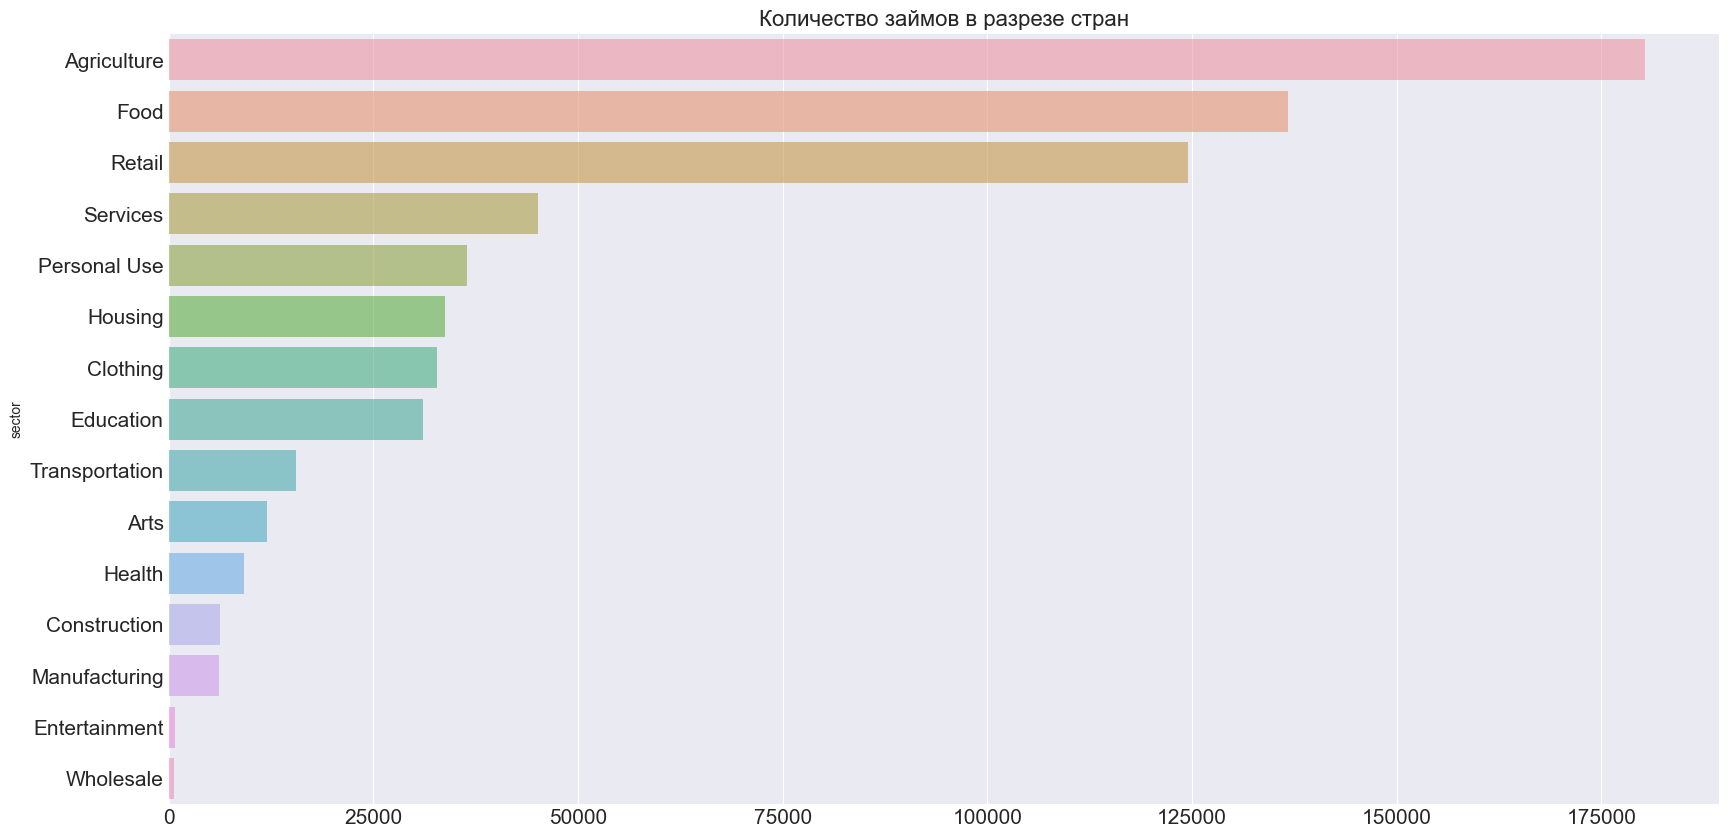

In [190]:
sectors = df_kiva_loans.sector.value_counts()

plt.figure(figsize=(20, 10))
plt.title('Количество займов в разрезе стран', fontsize=16)
plt.tick_params(labelsize=15)
sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

* Доминирующие секторы: сельское хозяйство, пищевая промышленность, а также торговля
    * Это неудивительно, учитывая, что, в основном, платформой Kiva активнее пользуются именно развивающиеся страны, полагающиеся на аграрную отрасль
* Важно понимать, что кредиты на Личные нужды занимают значительную долю
    * Это означает, что такие кредиты необходимо выплачивать в первую очередь, потому что заемщики такого типа крайне нуждаются

### 2.3.2. В разрезе видов деятельности

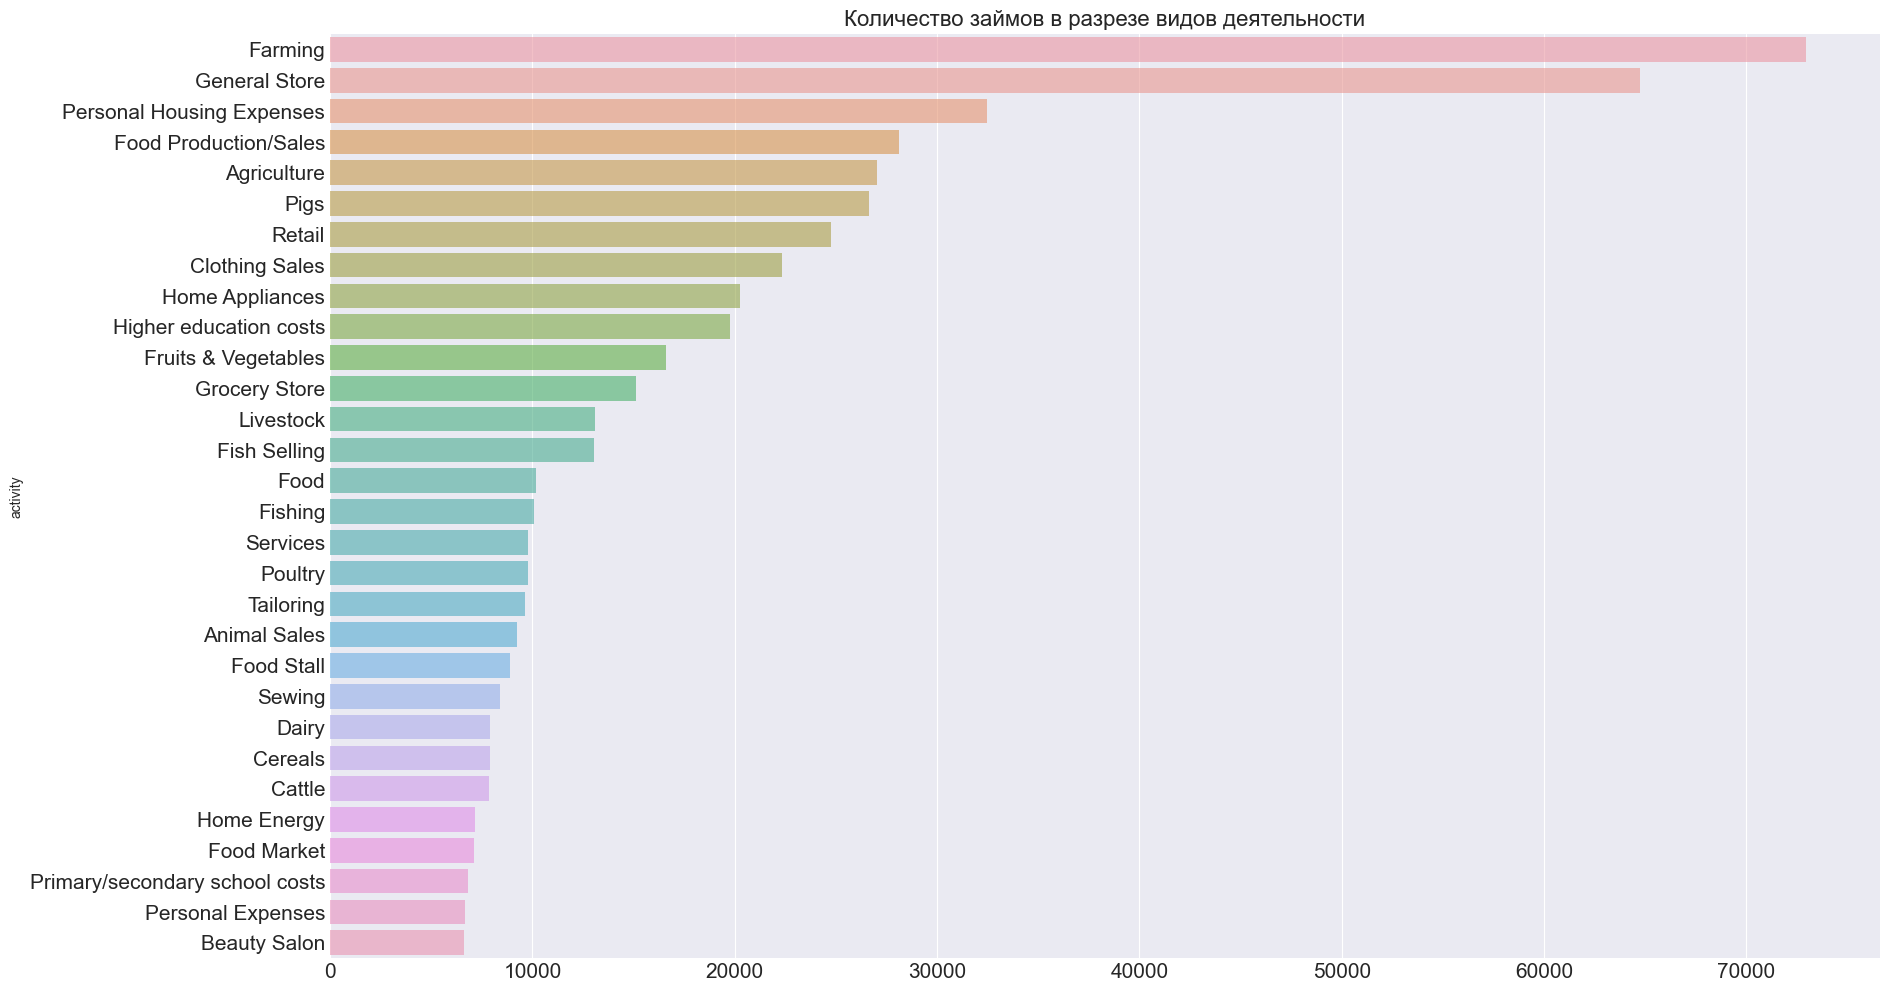

In [191]:
activities = df_kiva_loans.activity.value_counts().head(30)

plt.figure(figsize=(20, 12))
plt.title('Количество займов в разрезе видов деятельности', fontsize=16)
plt.tick_params(labelsize=15)
sns.barplot(x=activities.values, y=activities.index, alpha=0.6)
plt.show()

### 2.3.3. Рейтинг целевого назначения

In [192]:
activities = df_kiva_loans.use.value_counts().head(25)
activities

use
to buy a water filter to provide safe drinking water for their family.                                                          5217
to buy a water filter to provide safe drinking water for her family.                                                            4082
To buy a water filter to provide safe drinking water for their family.                                                          2141
to build a sanitary toilet for her family.                                                                                      1708
to build a sanitary toilet for her family                                                                                       1599
to buy ingredients for her food production business                                                                             1419
to purchase more groceries to sell.                                                                                             1409
to buy feed and other supplies to raise her pigs.                

##### В лидерах по целевому назначению займов вещи, удовлетворяющие базовые человеческие потребности:
* Покупка фильтров для воды
* Оборудование септика
* Светильники на солнечных батареях

### 2.3.4. Наиболее популярные виды деятельности

In [193]:
loans_by_activity_sector = df_kiva_loans[df_kiva_loans.sector.isin(sectors[:9].index.values)]\
    .groupby(['sector', 'activity']).loan_amount.count().reset_index()

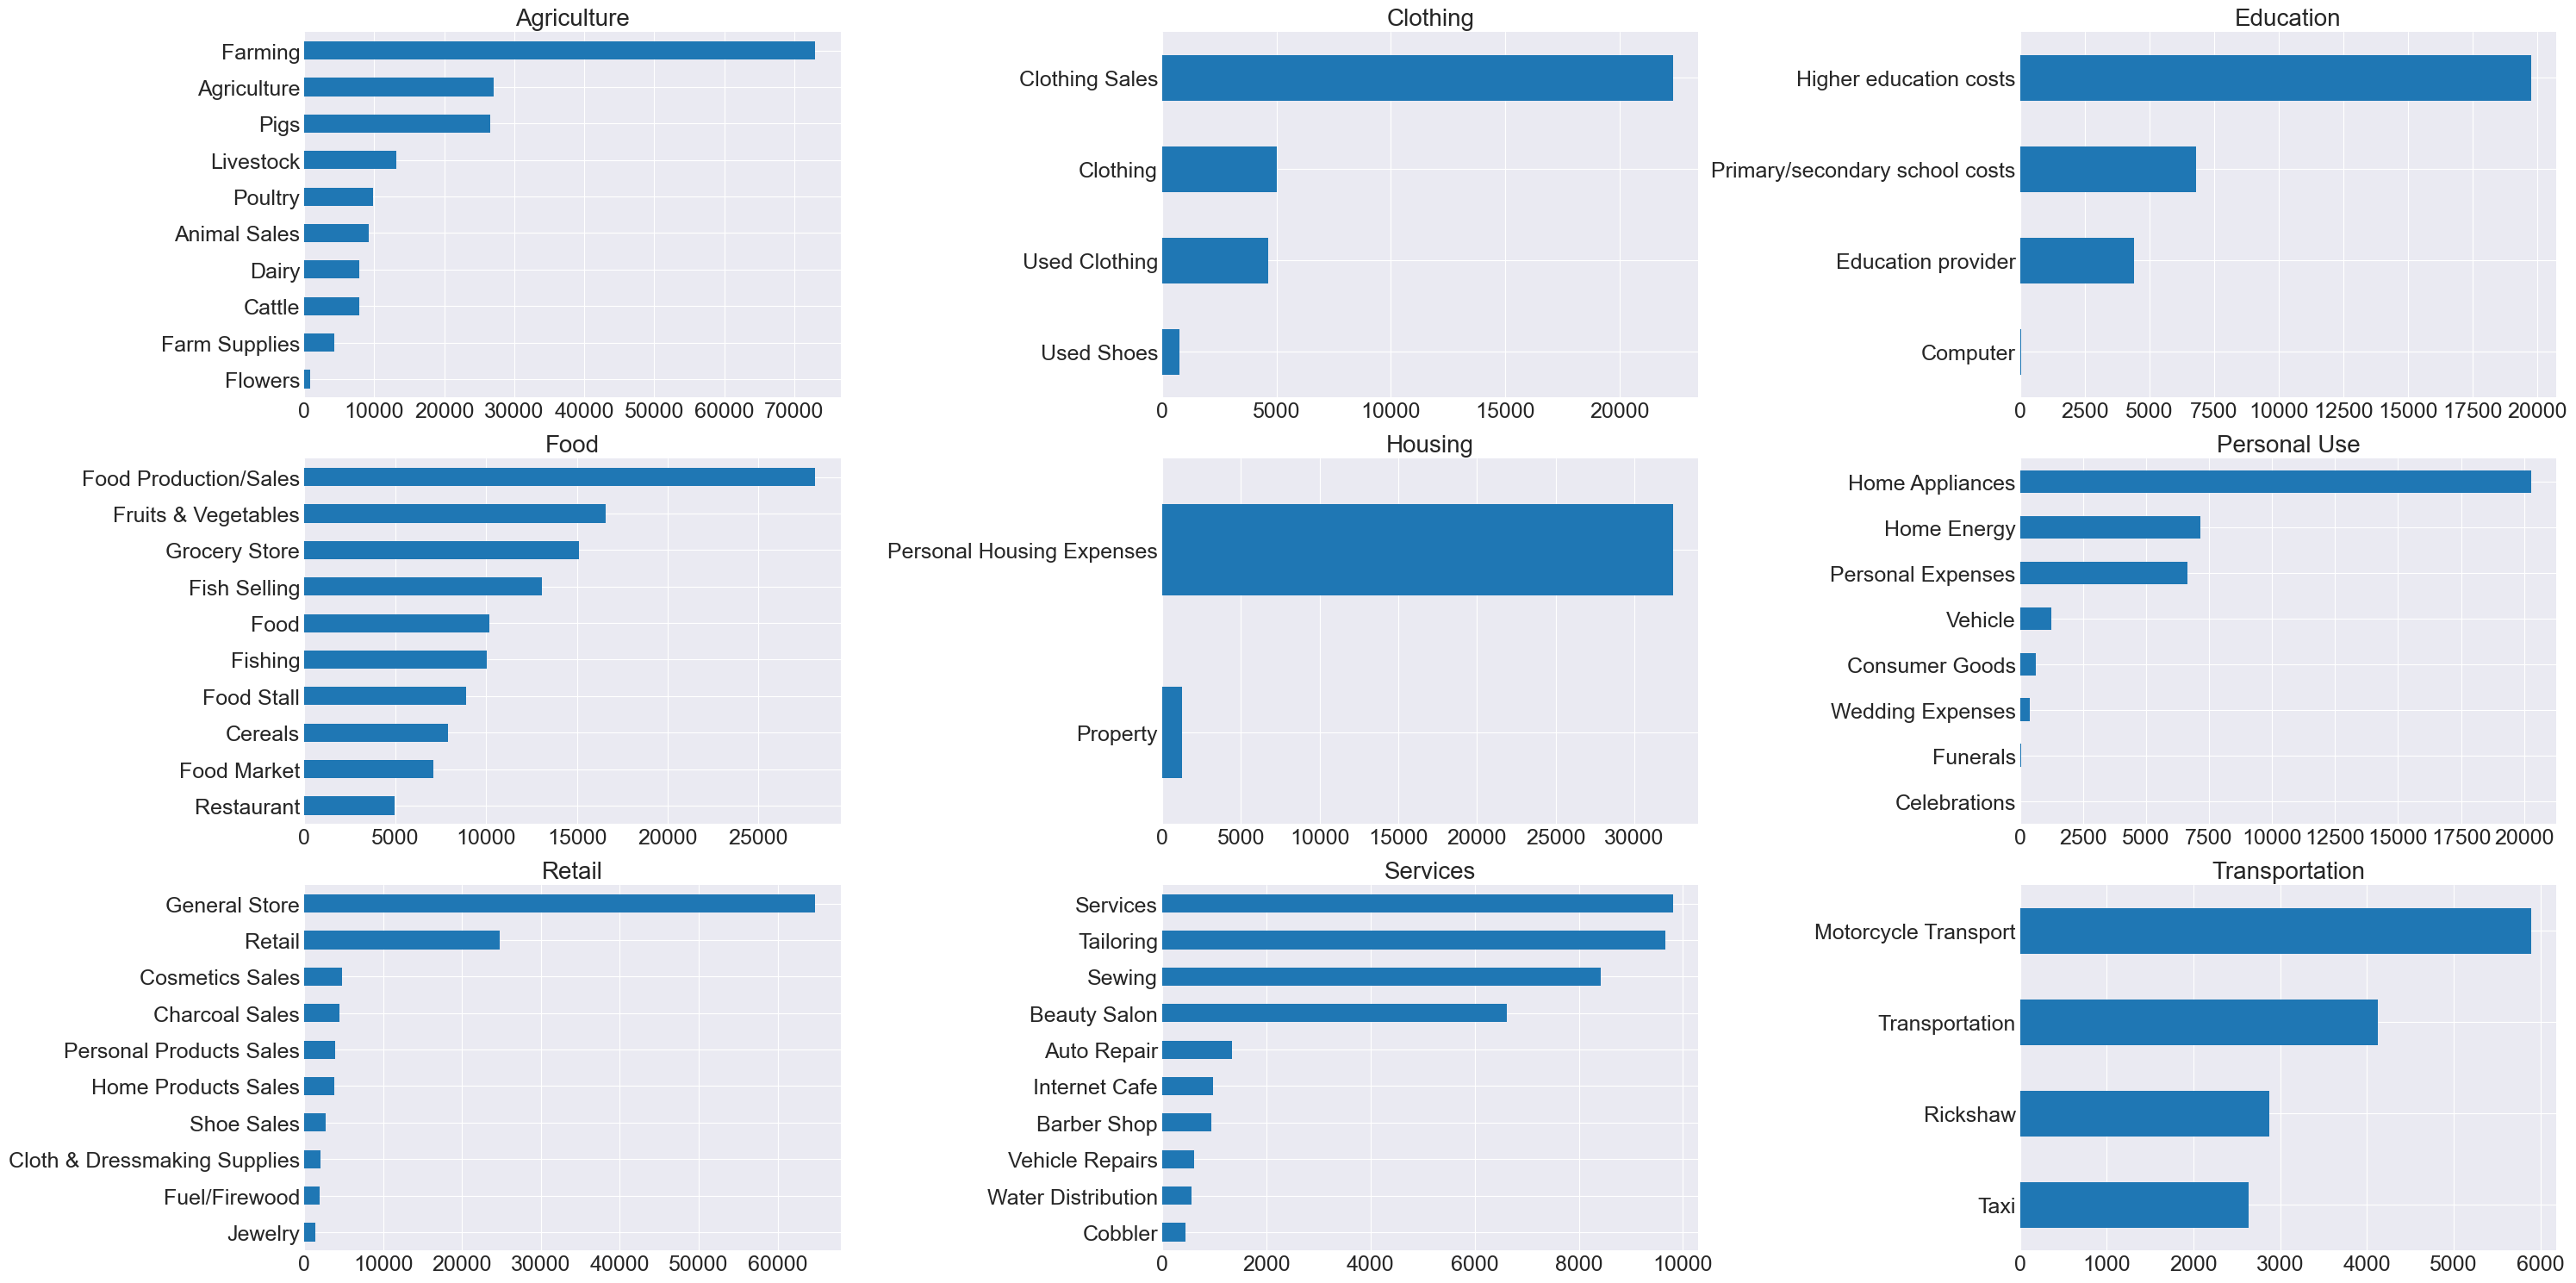

In [194]:
fig, axes = plt.subplots(3, 3, sharex=False, squeeze=False, figsize=(30, 15))

for ax, q in zip(axes.ravel(), loans_by_activity_sector.sector.unique()):
    tmp_df = loans_by_activity_sector[loans_by_activity_sector.sector.eq(q)]\
        .dropna().sort_values(by='loan_amount')[-10:]
    ax.set_title(q, fontsize=20)
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()

    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)

Огромная доля займов направлена на деятельность с невысокой добавленной стоимостью - Сельское хозяйство, розничная торговаля, сервис. То есть деятельность, в которой минимально задействованы смежные секторы экономики и невысок потенциал создания дополнительных рабочих мест и продуктов внутри страны, в отличие от, например, производственных предприятий, строительства, ремесленных мастерских, легкой промышленности.

Однако, также распространены заемы в направлении образования. Это, в свою очередь, позитивно сказывается на развитии всей страны в целом

### 2.4. Объем финансирования
### 2.4.1. Распределение суммы займов

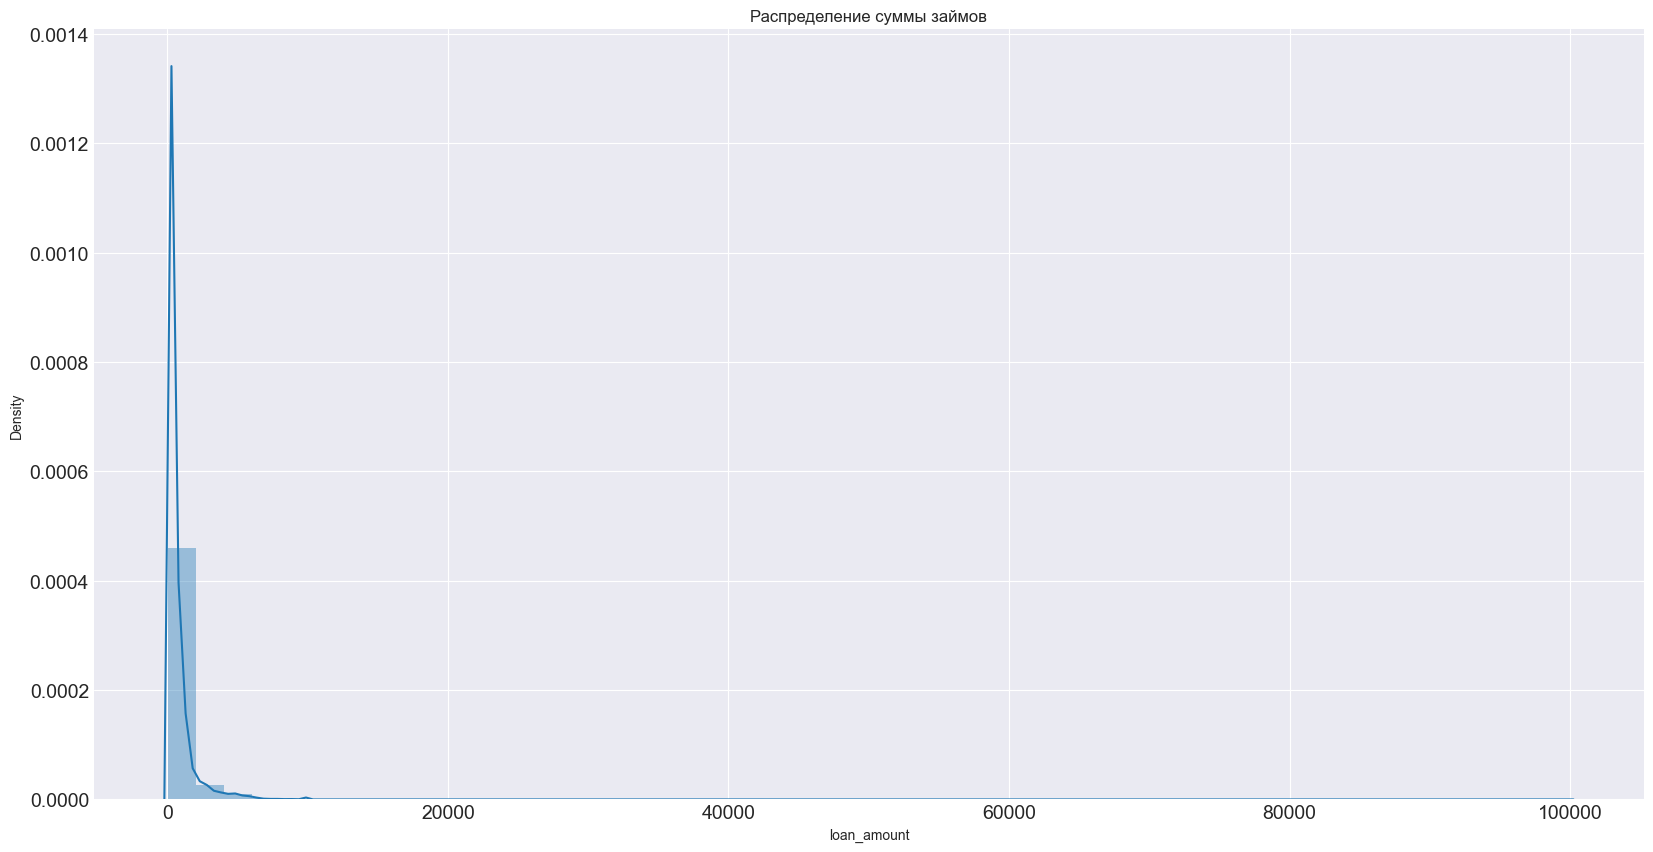

In [195]:
plt.figure(figsize=(20, 10))
plt.title('Распределение суммы займов')
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans['loan_amount'])
plt.show()

#### Избавимся от выбросов, используя правило трёх сигм.

In [196]:
df_sigma = df_kiva_loans[(df_kiva_loans['loan_amount'] > df_kiva_loans['loan_amount'].mean() - 3 * df_kiva_loans['loan_amount'].std())\
                              & (df_kiva_loans['loan_amount'] < df_kiva_loans['loan_amount'].mean()\
                                  + 3 * df_kiva_loans['loan_amount'].std())]['loan_amount']

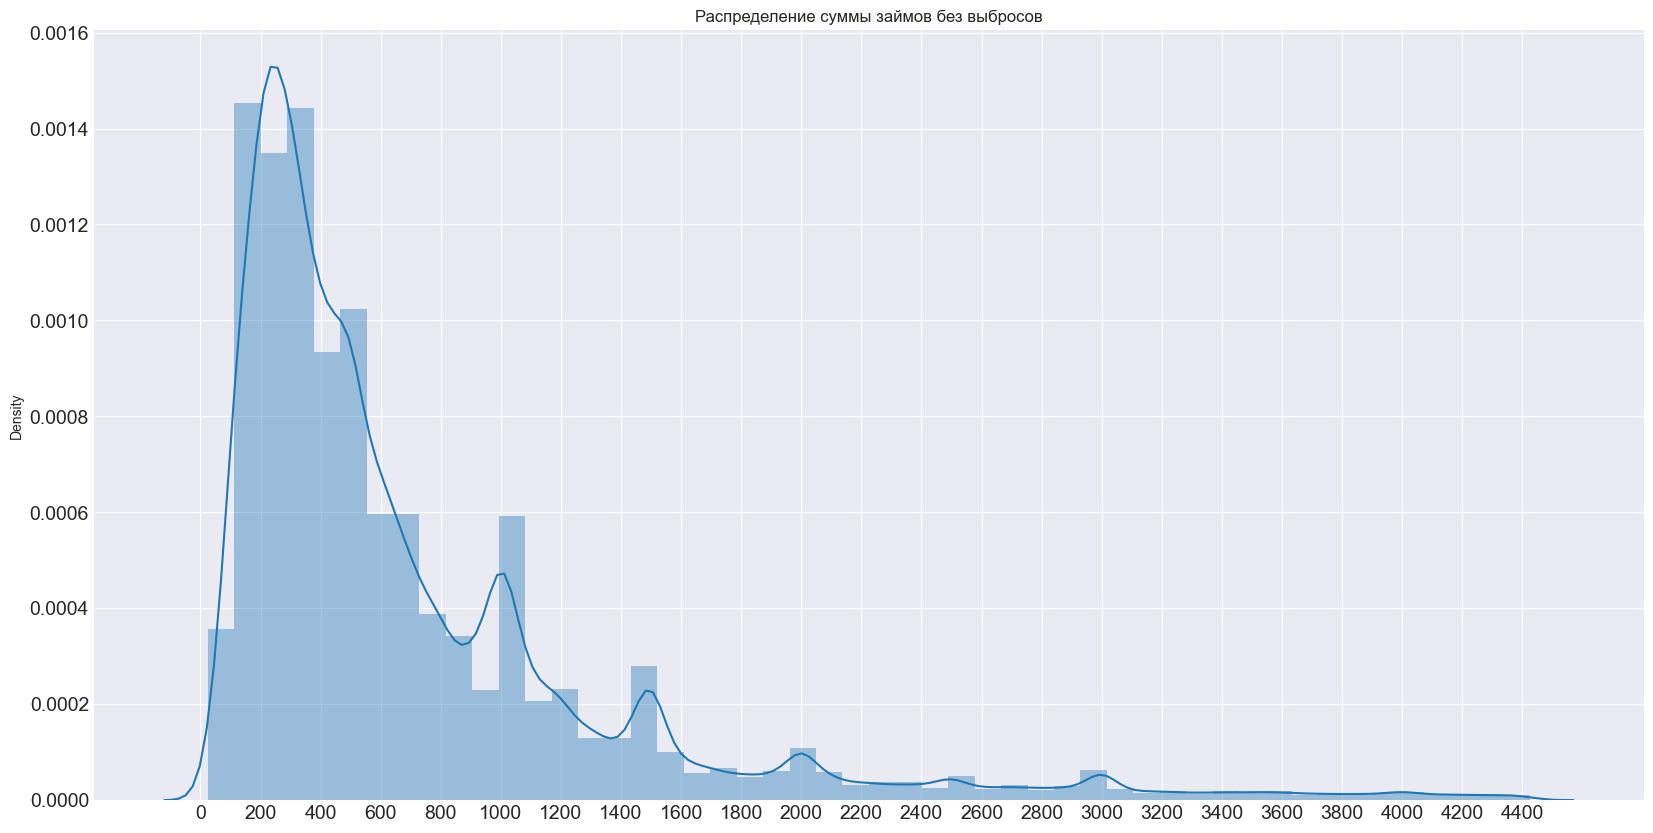

In [197]:
plt.figure(figsize=(20, 10))
plt.title('Распределение суммы займов без выбросов')
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, df_sigma.max(), 200))
sns.distplot(df_sigma, axlabel=False, bins=50)
plt.show()

* Большинство займов составляет 100 - 700 долларов с пиковыми значениями в районе 200 и 400 долларов
* Частота займов с ростом суммы займов уменьшается, однако можно заметить наличие нескольких пиков в районах 1000, 1500 и 2000 долларов
    * Можно предположить, что есть некоторый класс проектов, которые являются более сложными и финансируются бóльшими суммами

### 2.4.2. Суммы займов в разрезе секторов

#### Проанализируем выбросы

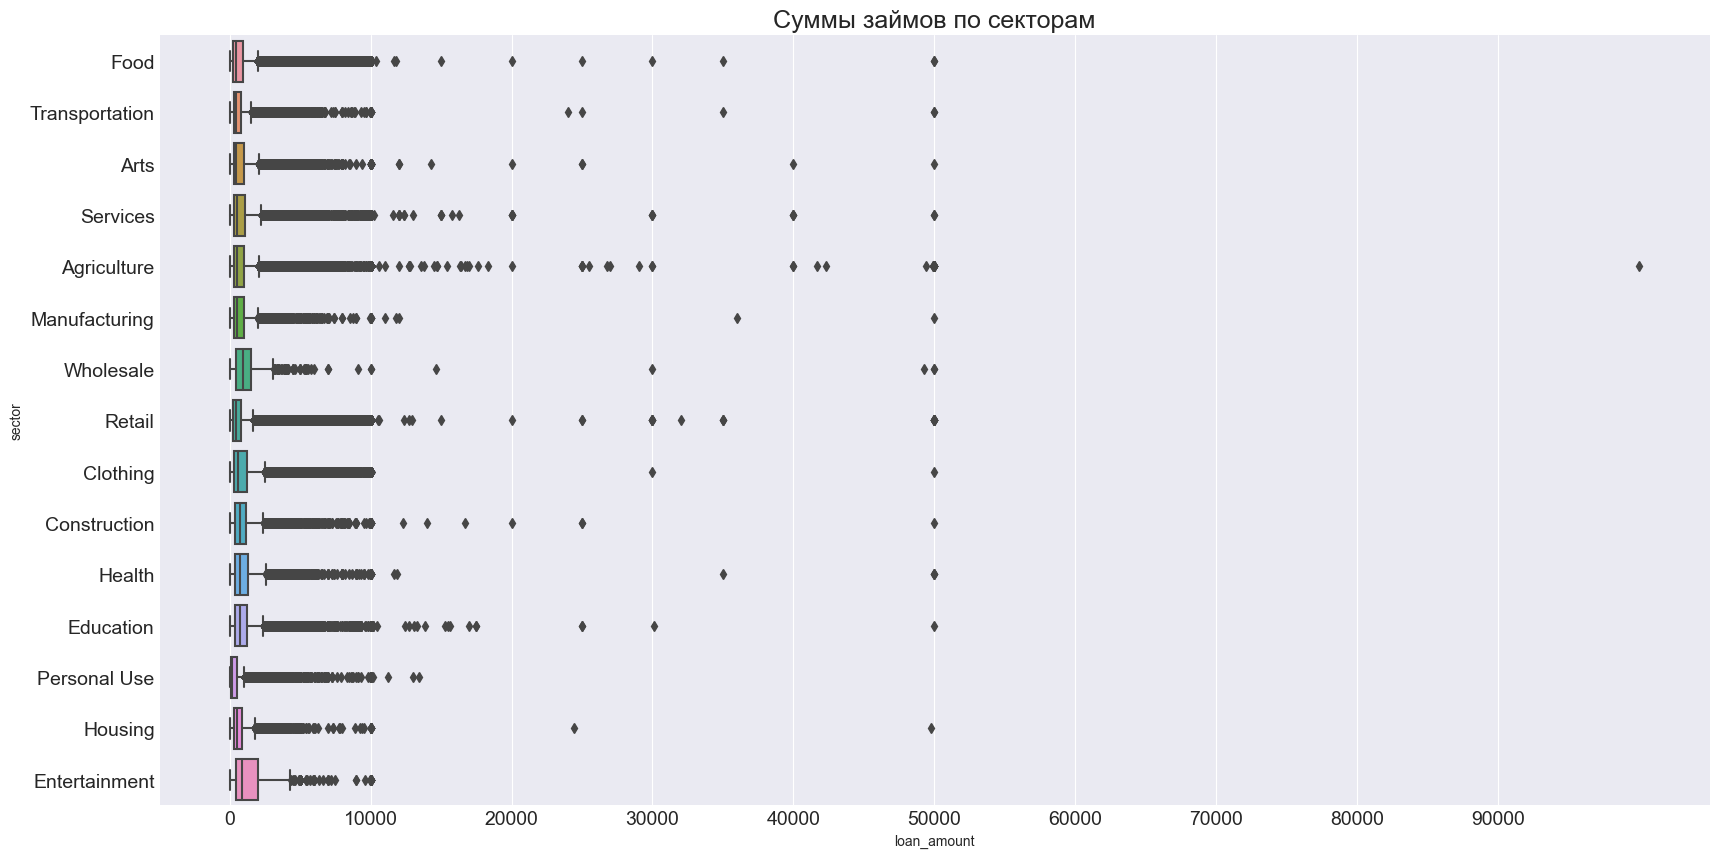

In [198]:
plt.figure(figsize=(20, 10))
plt.title('Суммы займов по секторам', fontsize=18)
plt.xticks(np.arange(0, df_kiva_loans.loan_amount.max(), 10000))
plt.tick_params(labelsize=14)
sns.boxplot(data=df_kiva_loans, x='loan_amount', y='sector')
plt.show()

* Из графика видно, что для всех секторов существуют значения-выбросы
    * Эти значения составляют, в основном, 50.000$, но для сектора сельского хозяйства присутствует выброс и в 100.000$
    * Для секторов "Личные нужды" и "Развлечения" максимальные значения выбросов ~ 15.000 и 10.000$ соответственно


In [199]:
sector_mean_median = df_kiva_loans.groupby('sector').loan_amount\
    .agg(median='median', mean='mean').sort_values(by='median', ascending=False)
sort_order = sector_mean_median.index.to_list()
sector_mean_median

,median,mean
sector,,
Wholesale,950.0,1569.716088
Entertainment,887.5,1673.674699
Education,725.0,998.565924
Health,725.0,1067.266616
Construction,700.0,1068.147735
Clothing,600.0,1139.237829
Services,550.0,1064.631148
Agriculture,500.0,793.490228
Housing,500.0,701.549020


Как видно, среднее значение по всей выборке превышает медианное в несколько раз почти во всех секторах

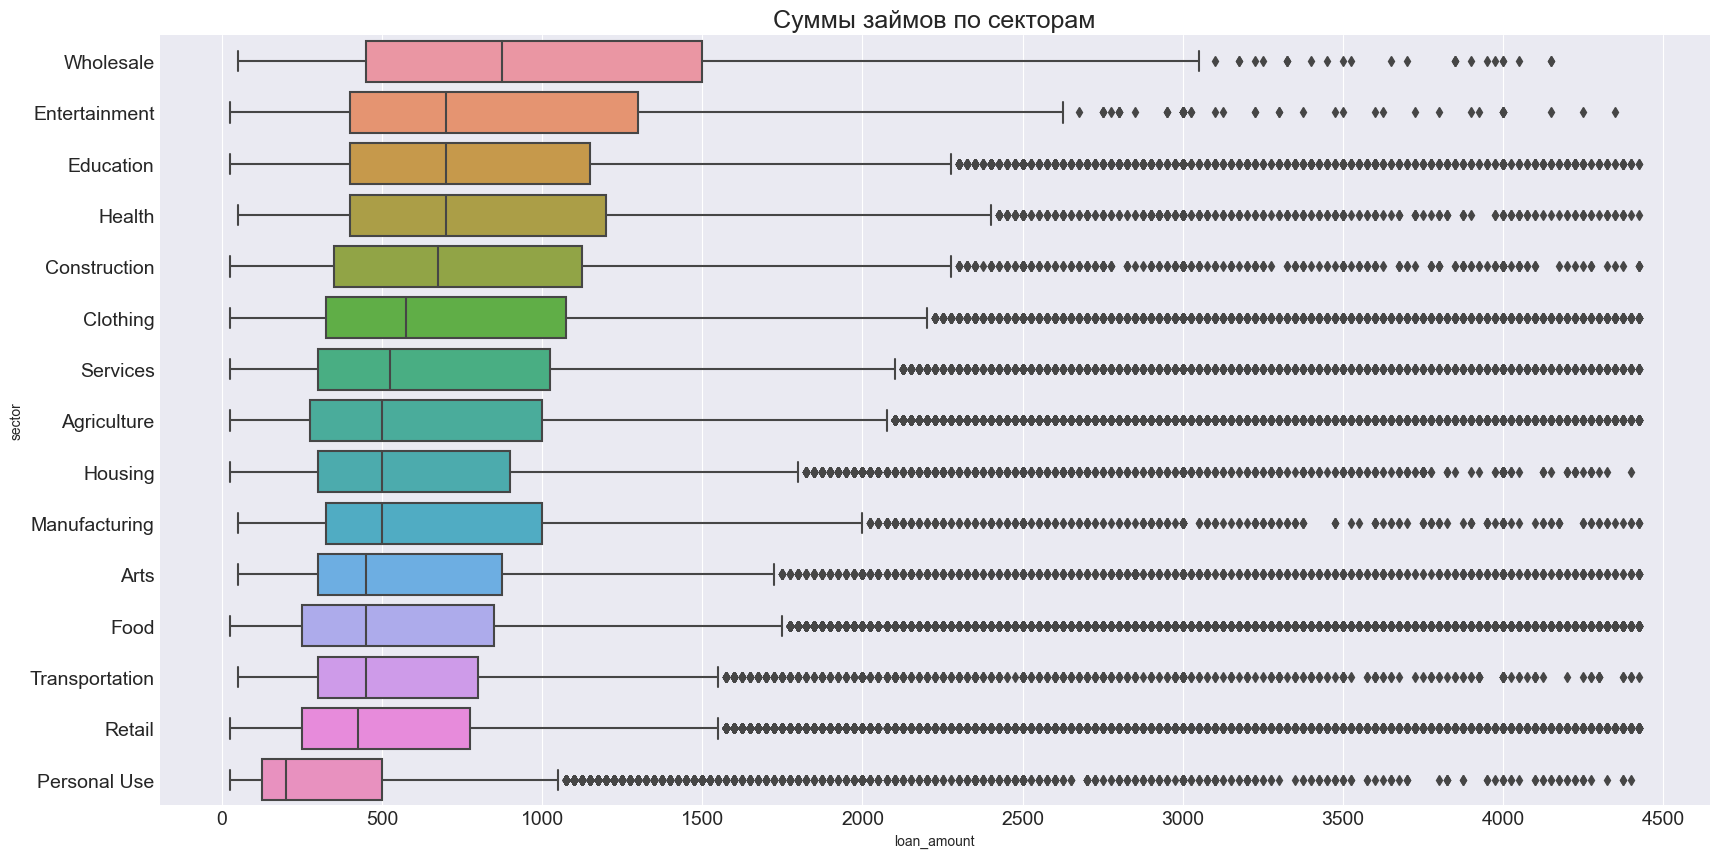

In [200]:
plt.figure(figsize=(20, 10))
plt.title('Суммы займов по секторам', fontsize=18)
plt.xticks(np.arange(0, df_sigma.max() + 100, 500))
plt.tick_params(labelsize=14)
sns.boxplot(data=df_kiva_loans[df_kiva_loans.loan_amount.isin(df_sigma)], x='loan_amount', y='sector', order=sort_order)
plt.show()

* Из графика видно, что медиана суммы заявок на Личные нужды обладает наименьшим значением. Однако именно эта группа заявок может свидетельствовать о случаях крайней нужды заявителей и бедности в различных странах
* Сектора с наибольшими показателями медианы суммы займа: Оптовая торговля, Сфера развлечений, Образование и Здравоохранение. Это вполне логично, ведь для развития эти секторы требуют значительных вложений

#### Проанализируем займы с очень высокими суммами ($45.000+)

In [201]:
df_big = df_kiva_loans[df_kiva_loans.loan_amount > 45000]
for n, i in enumerate(df_big.use.values):
    df_big.use.values[n] = str(df_big.use.values[n]).lower()

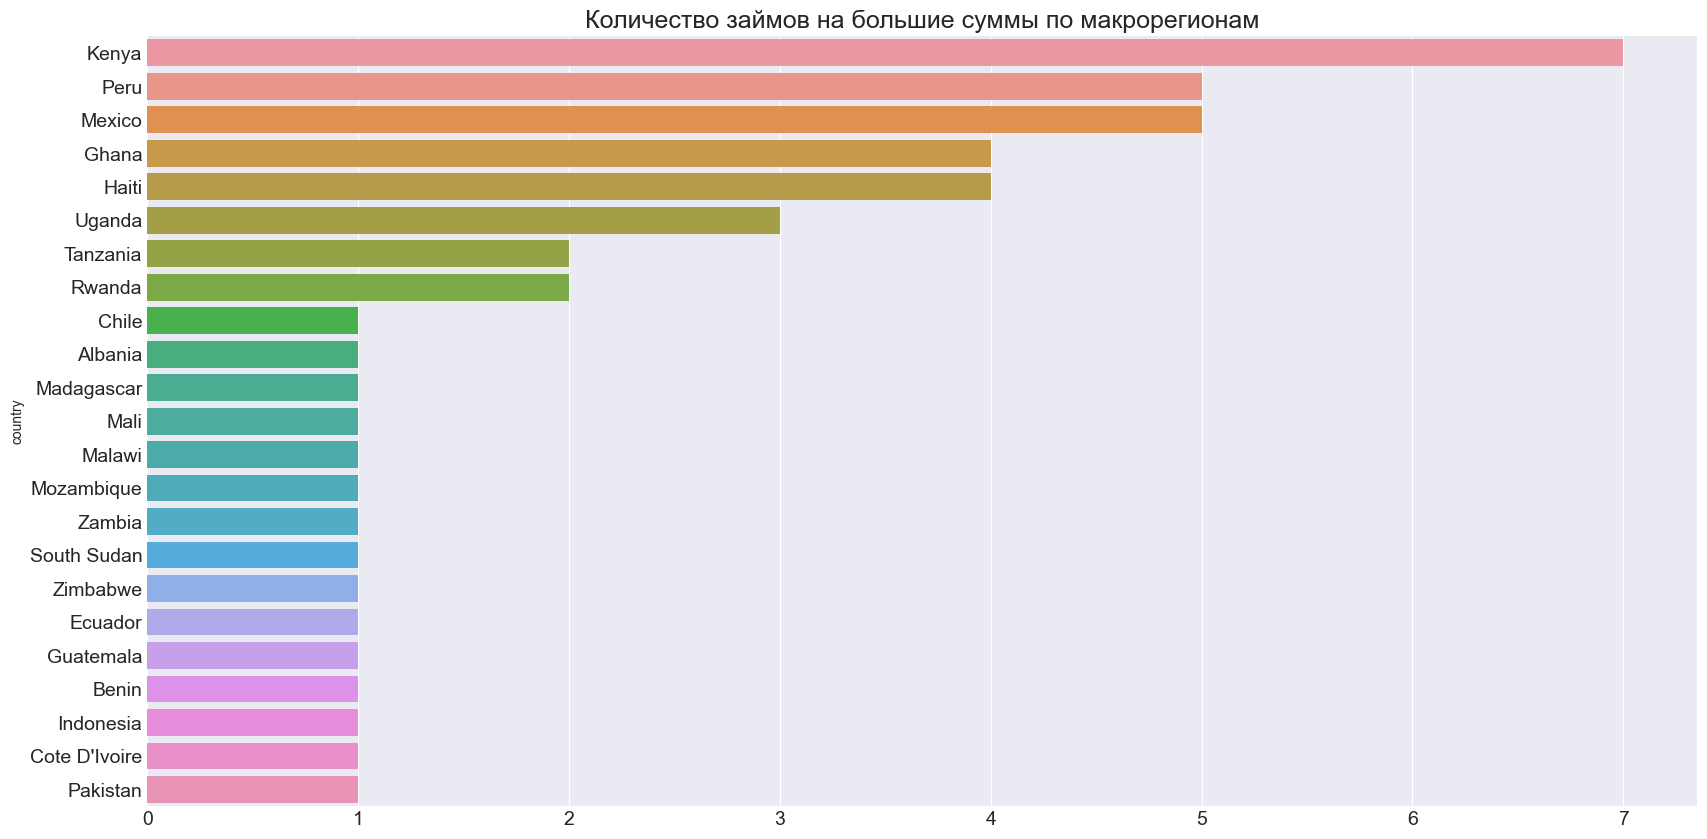

In [202]:
plt.figure(figsize=(20, 10))
plt.title('Количество займов на большие суммы по макрорегионам', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(x=df_big.country.value_counts().values, y=df_big.country.value_counts().index)
plt.show()

* Филлипины отсутствуют в данном списке, что подтверждает предположение о том, что там наиболее распространены небольшие займы

#### На какие нужды берутся столь большие суммы?

In [203]:
activities_big_loan_amount = df_big[df_big.use != 'nan'].use.value_counts().head(10)
activities_big_loan_amount

use
to buy and sell barefoot power's solar lighting products                                                                                                                 2
to mitigate co2 & household air pollution, while also saving wood, money, & time by selling efficient cookstoves in malawi.                                              1
to distribute 200+ innovative & affordable pay-as-you-go solar home systems across zambia                                                                                1
to enable 5,000 additional small-holder farmers across rural kenya to sustainably harvest croton nuts—an abundant and indigenous crop with no previous commercial use    1
to bolster logistics of affordable water distribution in underserved haitian communities                                                                                 1
to provide community trauma services in south sudan.                                                                                         

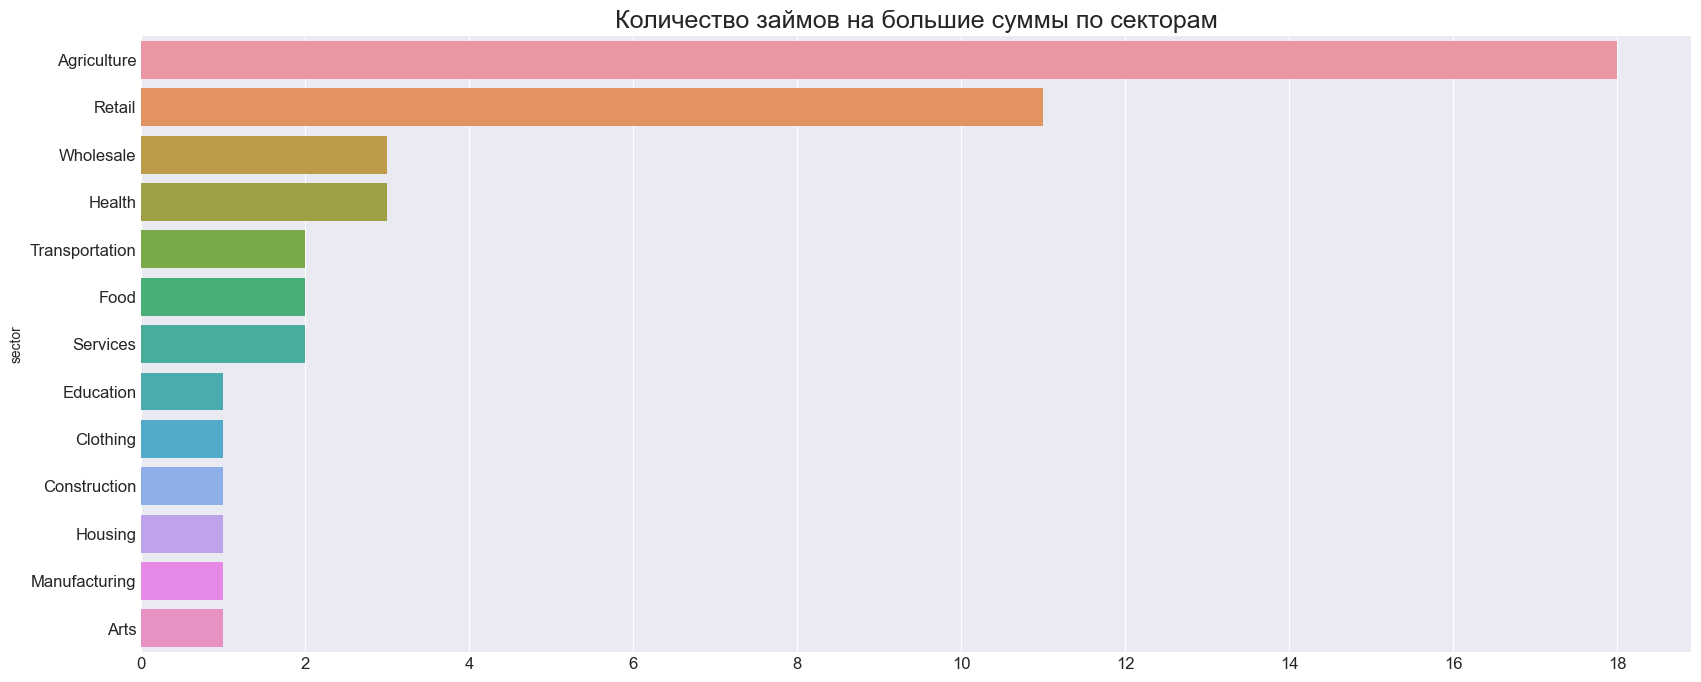

In [204]:
plt.figure(figsize=(20, 8))
plt.title('Количество займов на большие суммы по секторам', fontsize=18)
plt.xticks(np.arange(0, df_big.sector.value_counts().values.max() + 1, 2))
plt.tick_params(labelsize=12)
sns.barplot(x=df_big.sector.value_counts().values, y=df_big.sector.value_counts().index)
plt.show()

* Среди займов на большие суммы так же преобладают сферы сельского хозяйства, продаж и здравоохранения, что логично.
    * Ведь для развития эти отрасли требуют немалых вложений

#### Рассмотрим гендерную структуру заемщиков

In [205]:
genders = {'male': 0, 'female': 0, 'group': 0}
for j in genders:
    genders[j] = sum([i[2] for i in df_big.groupby(['country', 'borrower_genders'], as_index=False).size().values if i[1] == j])
genders = pd.DataFrame.from_dict({'gender': genders.keys(), 'count': genders.values()}).set_index('gender')
genders

,count
gender,
male,26
female,15
group,6


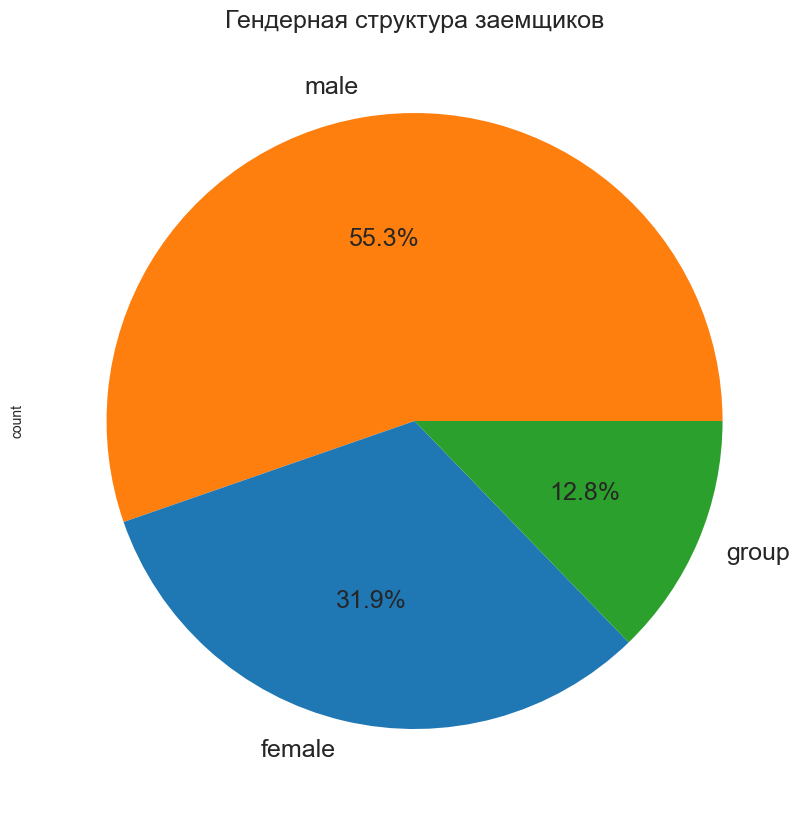

In [206]:
plt.figure(figsize=(10, 10))
plt.title('Гендерная структура заемщиков', fontsize=18)
color = {
    'female': '#1f77b4',
    'group': '#2ca02c',
    'male': '#ff7f0e',
}
genders['count'].plot.pie(fontsize=18, labeldistance=1.1, autopct='%1.1f%%', colors=[color[key] for key in genders.index])
plt.show()

* Ситуцаия здесь уже иная. Среди заемщиков преобладают мужчины

### 2.4.3. Распределение сумм займа по макрорегионам

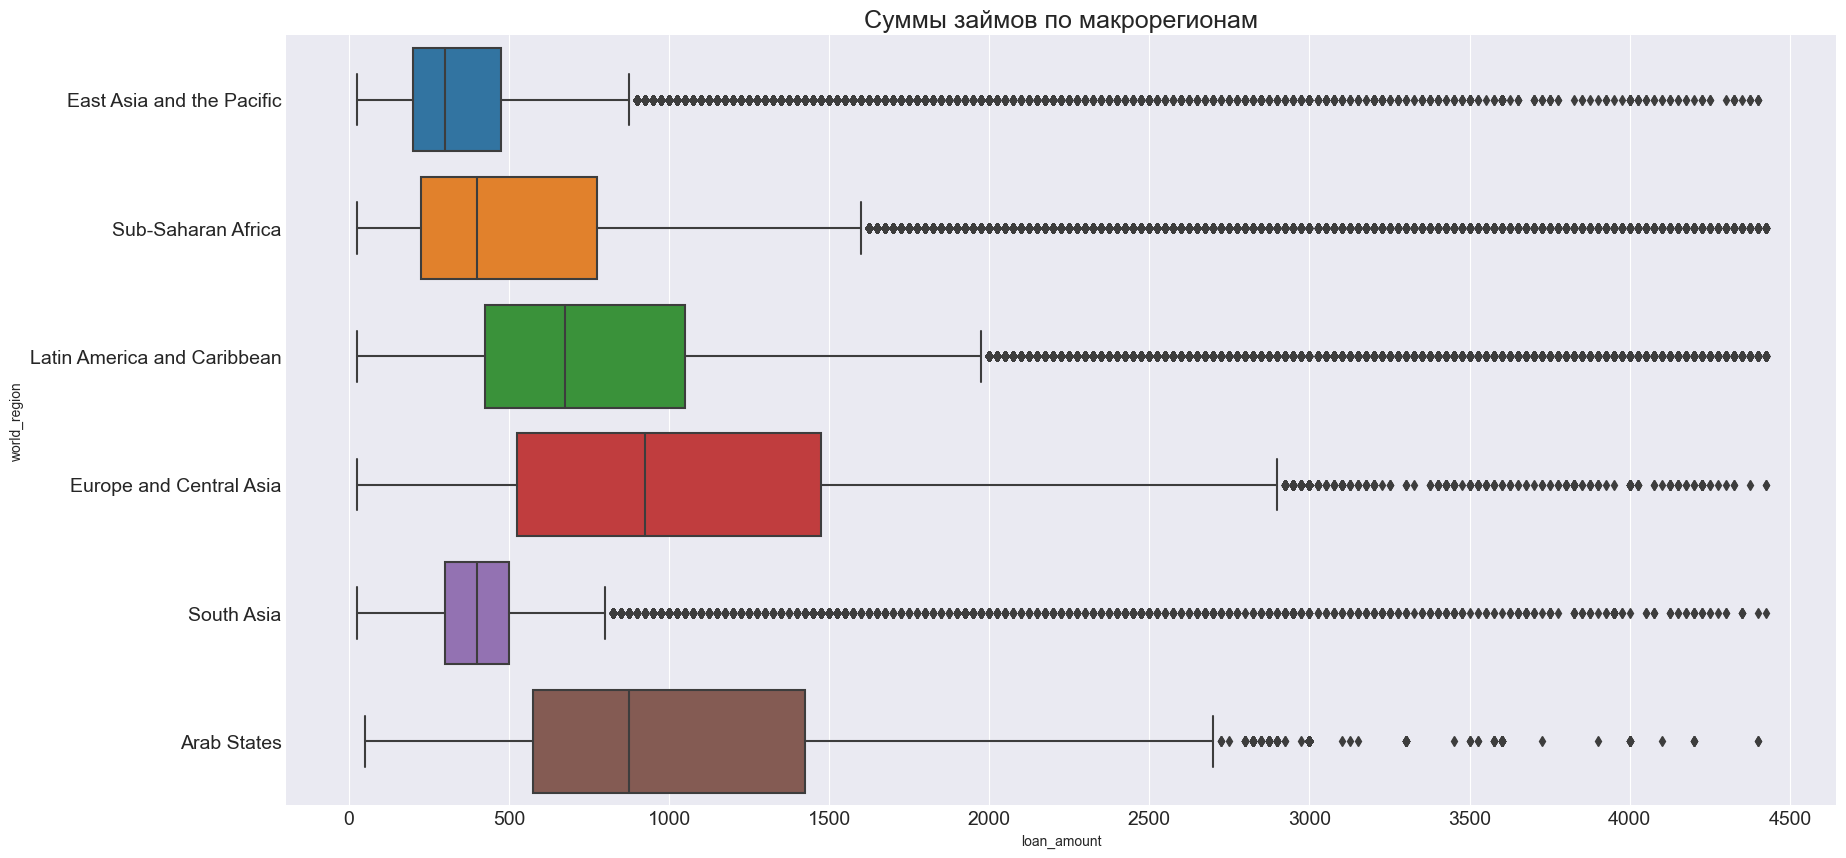

In [207]:
plt.figure(figsize=(20, 10))
plt.title('Суммы займов по макрорегионам', fontsize=18)
plt.xticks(np.arange(0, df_sigma.max() + 100, 500))
plt.tick_params(labelsize=14)

sns.boxplot(data=df_kiva_loans[df_kiva_loans.loan_amount.isin(df_sigma)], x='loan_amount', y='world_region', order=regions_list)
plt.show()


Регионы расположены в порядке убывания количества займов.
* Скорее всего, те регионы, в которых медианные значения ниже, в целом беднее и требуют финансирования небольшими, но частыми займами.
    * Эта ситуация наблюдается в Юго-Восточной Азии, лидерами, в которой, являются Филиппины и Камбоджа
* Южная Азия - регион выбивающийся из последовательности (здесь это Пакситан и Индия). Вероятно, в этом регионе есть отличная площадка для расширения присутствия и поддержки со стороны Kiva

### 2.5. Время ожидания средств

In [208]:
df_trimmed = df_kiva_loans[df_kiva_loans['loan_amount'].isin(df_sigma)]

df_loans_dates = df_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

dates = ['posted_time', 'disbursed_time']

df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x: x.split('+')[0]).apply(pd.to_datetime)

df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time'] - df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates.loc[:, 'time_funding'] / timedelta(days=1)

dev = (df_loans_dates['time_funding'] - df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()

df_loans_dates_trimmed = df_loans_dates[~(dev > 3 * std) & (df_loans_dates.loc[:, 'time_funding'] > 0)]
df_loans_dates_trimmed.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count,MPI,time_funding
count,2.798900e+04,27989.000000,27989.000000,23294.000000,27989.000000,27989.000000,26587.000000,27989.000000
mean,9.973826e+05,611.505413,611.505413,243.447325,14.938762,19.657508,0.200340,14.320215
std,1.672924e+05,670.311692,670.311692,98.193205,12.986574,20.884818,0.086024,11.289711
min,6.532750e+05,25.000000,25.000000,9.000000,1.000000,1.000000,0.000000,0.000069
25%,8.582260e+05,200.000000,200.000000,164.000000,9.000000,7.000000,0.202833,4.769109
50%,1.017685e+06,375.000000,375.000000,222.000000,13.000000,13.000000,0.209375,11.634722
75%,1.090094e+06,750.000000,750.000000,301.000000,14.000000,24.000000,0.209375,23.755845
max,1.334147e+06,4425.000000,4425.000000,504.000000,133.000000,184.000000,0.549778,40.555162


* Отброшены строки с пропущенными значениями для столбцов disbursed_time и funded_time
* Вычислен интервал между датами размещения заявки на сайте и зачисления денег заемщику
* Так же из рассмотрения исключены заявки, для которых деньги сначала выдаются агентами на местах, а затем публикуются на сайте

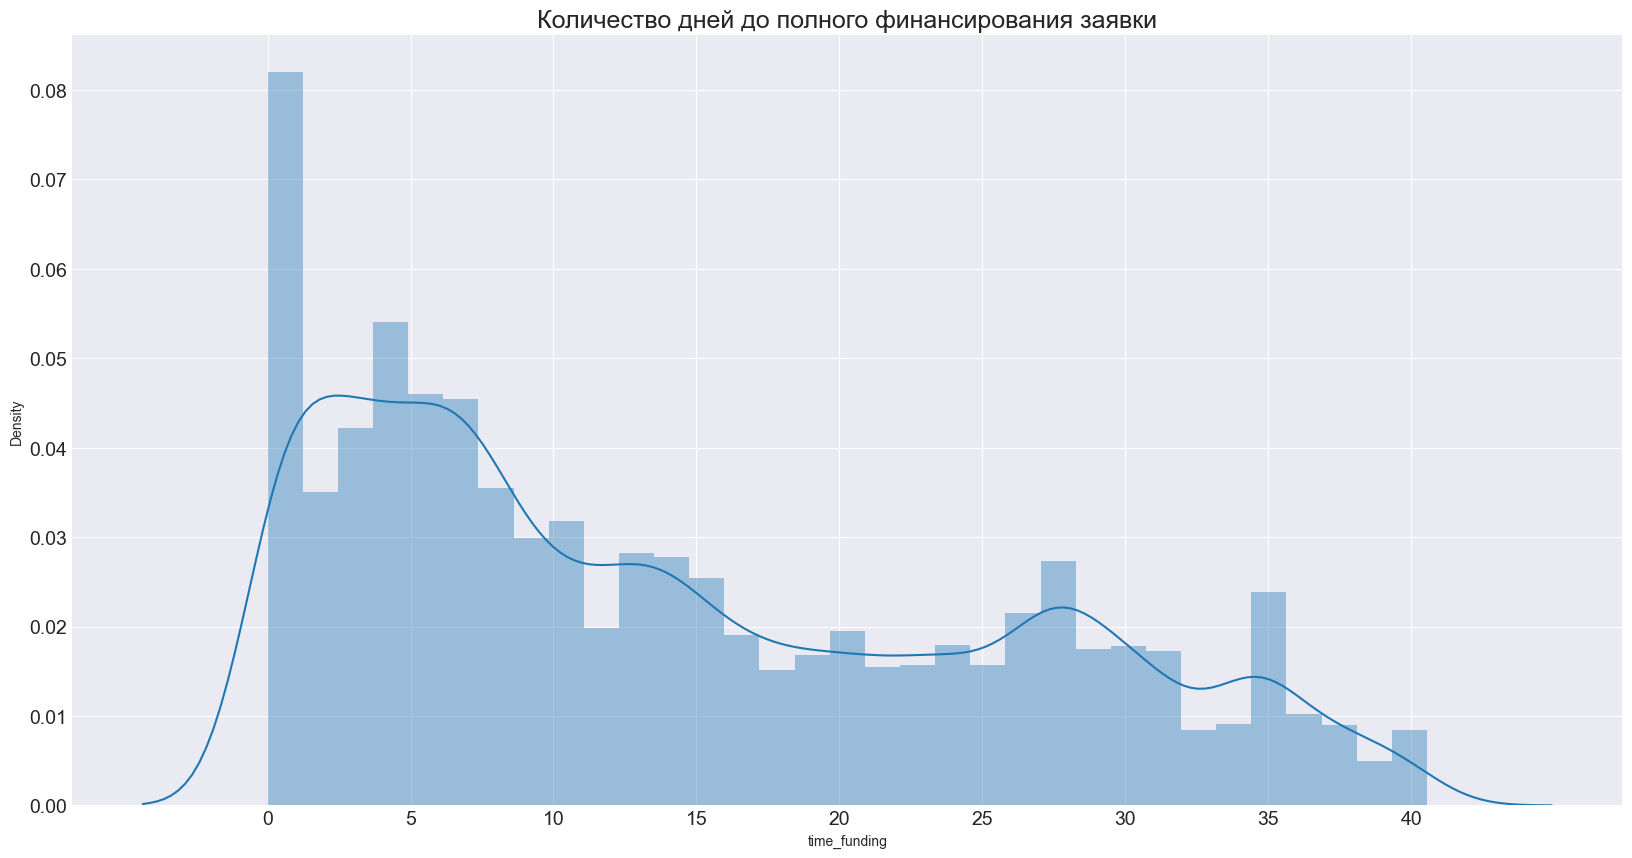

In [209]:
plt.figure(figsize=(20, 10))
plt.title('Количество дней до полного финансирования заявки', fontsize=18)
plt.xticks(np.arange(0, max(df_loans_dates_trimmed.time_funding) + 1, 5))
plt.tick_params(labelsize=14)

sns.distplot(df_loans_dates_trimmed.time_funding)
plt.show()

* Бóльшая часть заявок финансируется в течение первых 10 дней
* Однако из графика видно наличие пиков в районе 27 и 35 дней. Это может говорить о том, что часть заявок проходит довольно длительный процесс финансирования
#### Построим тепловую карту того, за какое количество дней финансируются заявки на разные суммы

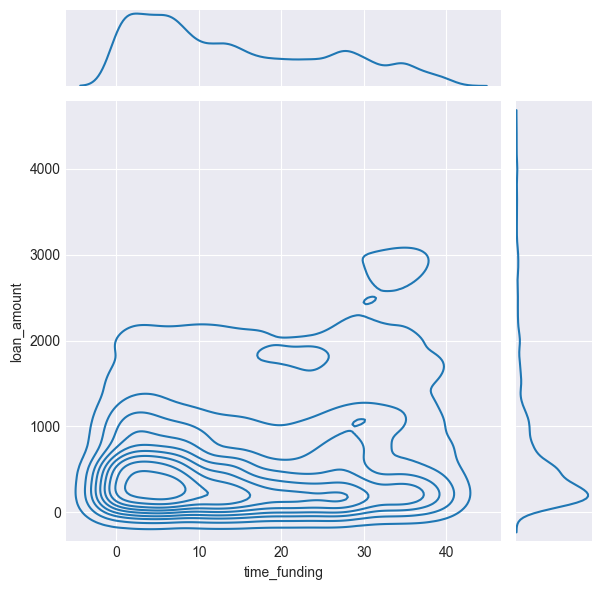

In [210]:
sns.jointplot(data=df_loans_dates_trimmed, x='time_funding', y='loan_amount', kind='kde')


* Возрастающее количество дней, требуемое для финансирования заявки, можно объяснить возрастающей суммой, но не во всех случаях
* На графике также можно видеть наличие большого количества заявок на суммы до 250$ со сроками 20-35 дней.

Kiva следует предпринять что-то, чтобы сотрудники чаще обращали внимание на подобные заявки

### 2.5.3. Время ожидания в различных странах

In [349]:
def many_graphs(data_fr: pd.DataFrame, n: int, m: int, f_size: tuple, x_labels: list, titles: list, yy: str, xx: list):
    fig, ax = plt.subplots(n, m, sharey=True, figsize=f_size)
    for i in range(m):
        sns.barplot(data=data_fr, y=yy, x=xx[i], alpha=0.6, ax=ax[i])
        ax[i].set_title(titles[i], fontsize=20)
        ax[i].set_xlabel(x_labels[i], fontsize=18)
        ax[i].set_ylabel(None)
        ax[i].tick_params(labelsize=16)
    plt.tight_layout()
    plt.show()

In [350]:
df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country'])\
    .agg({'loan_amount': 'median', 'time_funding': 'median', 'term_in_months': 'median'}).reset_index()
df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='time_funding')

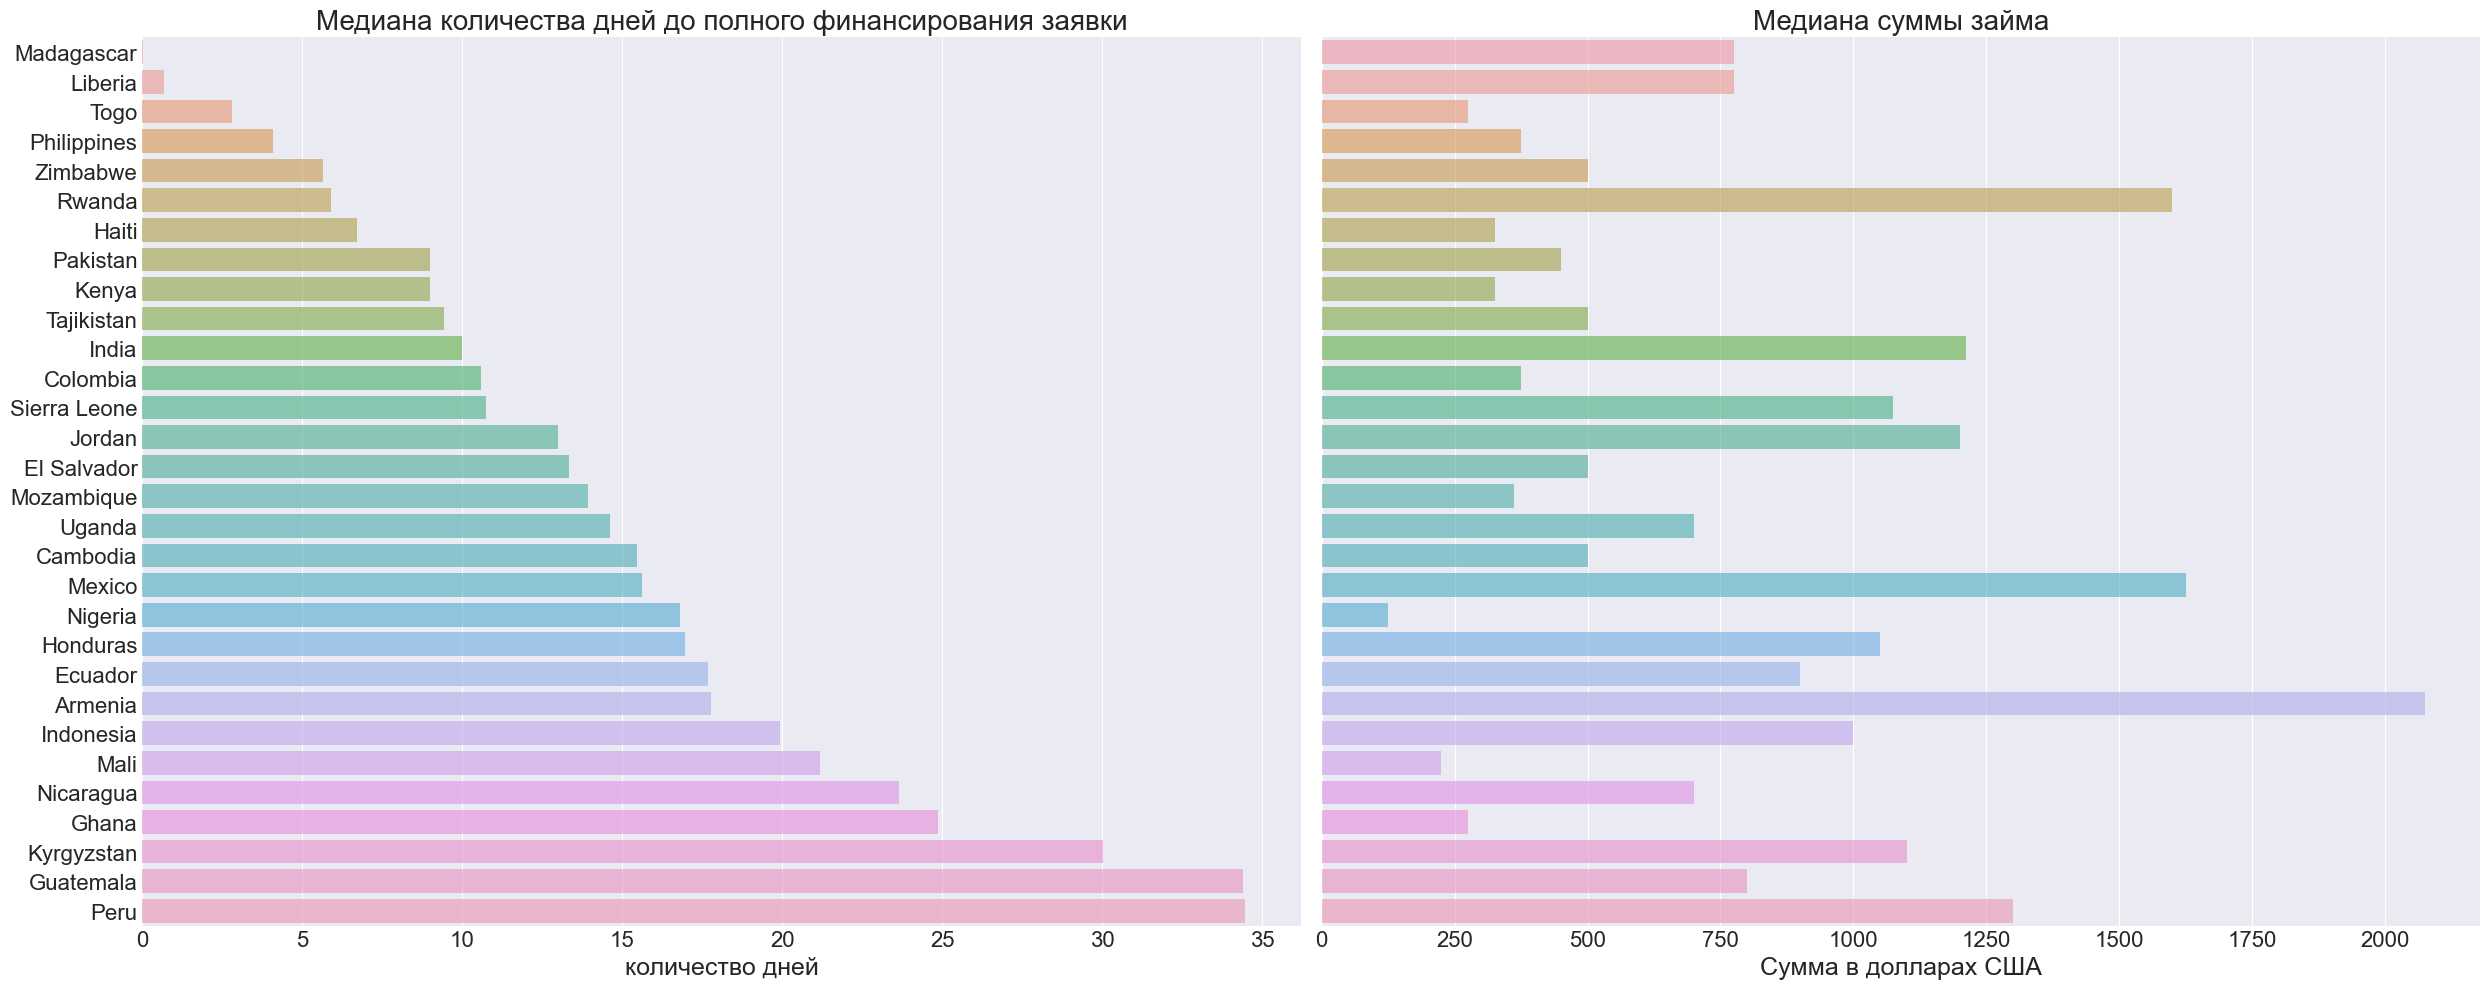

In [345]:
x_labels = ['количество дней', 'Сумма в долларах США']
titles = ['Медиана количества дней до полного финансирования заявки', 'Медиана суммы займа']
xx = ['time_funding', 'loan_amount']
many_graphs(df_country_median, 1, 2, (25, 10), x_labels, titles, 'country', xx)

##### Утверждение о том, что прямой связи между временем ожидания финансирования и суммой займа не наблюдается, становится очевидным из графиков выше
##### В ряде стран с довольно большой медианой суммы займа наблюдаются короткие интервалы на сбор средств:
* Либерия: 750$ - 1 день
* Руанда: 1600$ - 5дней
* Индия: 1250$ - 10 дней

##### И наоборот:
* Нигерия: 125$ - 17 дней
* Мали: 250$ - 22 дня
* Гана: 250$ - 25 дней

### 2.6. Сумма кредита и время погашения

Рассмотрим соотношение суммы кредита и времени погашения. Это даст нам представление о том, сколько в среднем человек готов тратить на погашение кредита в конкретной стране

In [333]:
df_country_median = df_country_median.sort_values(by='term_in_months')
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']

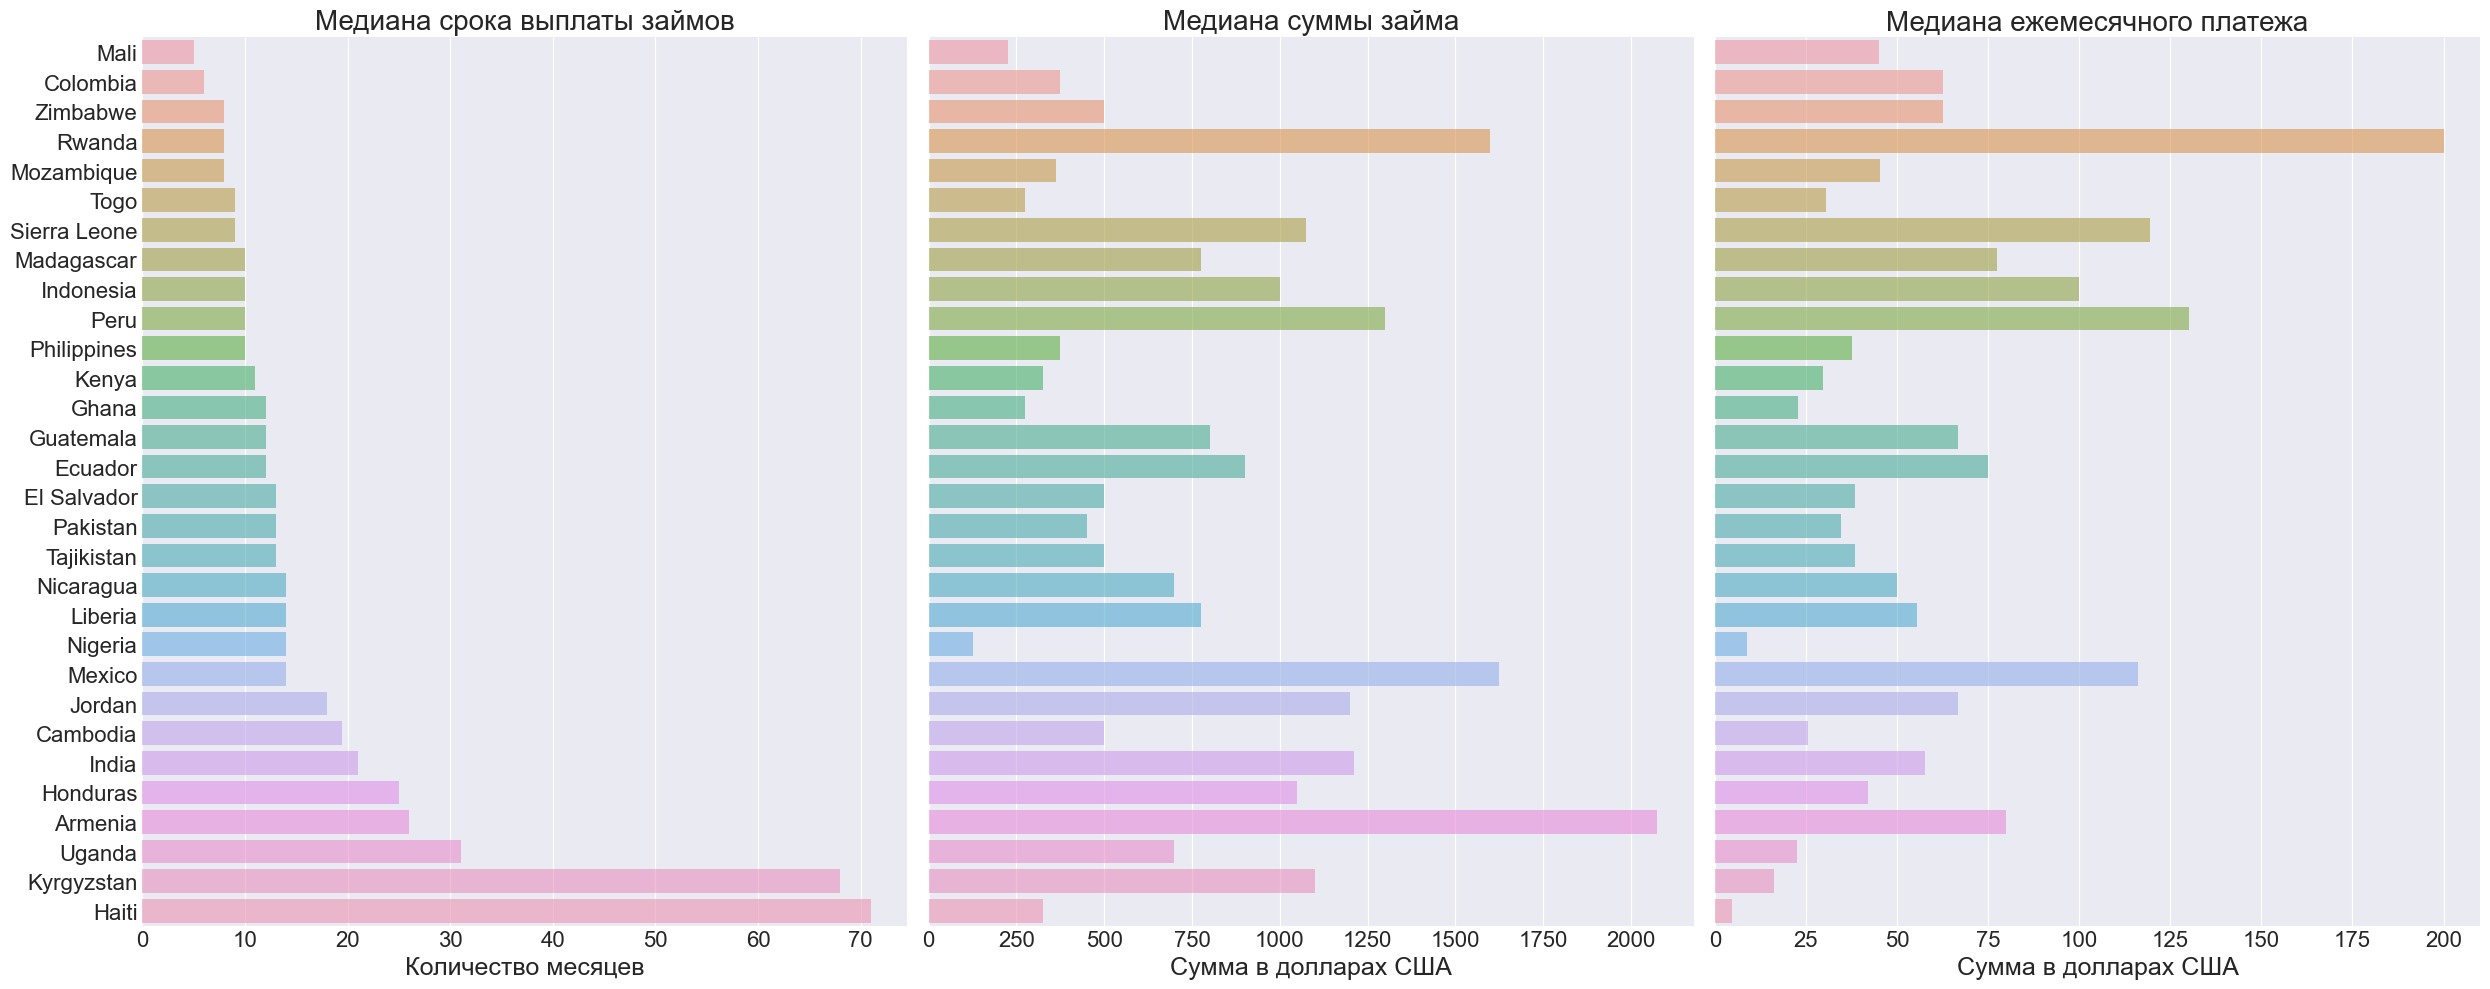

In [334]:
x_labels = ['Количество месяцев', 'Сумма в долларах США', 'Сумма в долларах США']
titles = ['Медиана срока выплаты займов', 'Медиана суммы займа', 'Медиана ежемесячного платежа']
xx = ['term_in_months', 'loan_amount', 'monthly_repayment']

many_graphs(df_country_median, 1, 3, (25, 10), x_labels, titles, 'country', xx)

#### Рассмотрим корреляции данных для метрик: сумма займа, срок займа, время финансирования заявки, ежемесячный платеж в разрезе макрорегионов

In [338]:
research_list = ['world_region', 'loan_amount', 'time_funding', 'term_in_months', 'monthly_repayment']
ndf = df_country_median[research_list].groupby('world_region', as_index=False).agg('median').sort_values(by='term_in_months')
ndf


,world_region,loan_amount,time_funding,term_in_months,monthly_repayment
5,Sub-Saharan Africa,431.25,9.866042,9.5,45.156250
1,East Asia and the Pacific,500.00,15.461314,10.0,37.500000
3,Latin America and Caribbean,800.00,16.968953,13.0,62.500000
4,South Asia,831.25,9.488134,17.0,46.176740
0,Arab States,1200.00,12.992986,18.0,66.666667
2,Europe and Central Asia,1100.00,17.776632,26.0,38.461538


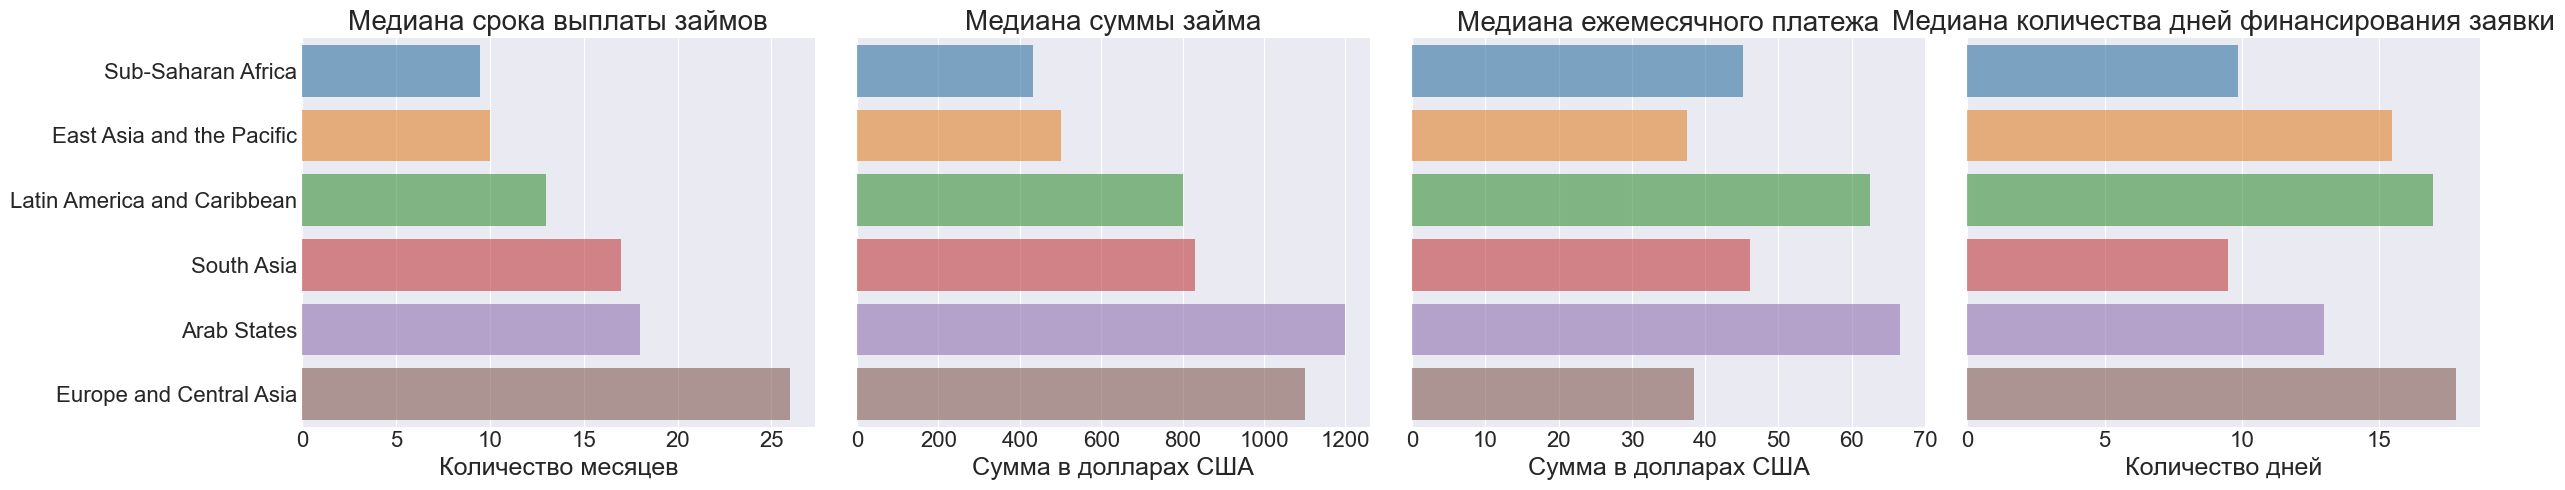

In [348]:
x_labels = ['Количество месяцев', 'Сумма в долларах США', 'Сумма в долларах США', 'Количество дней']
titles = ['Медиана срока выплаты займов', 'Медиана суммы займа', 'Медиана ежемесячного платежа', 'Медиана количества дней финансирования заявки']
xx = ['term_in_months', 'loan_amount', 'monthly_repayment', 'time_funding']

many_graphs(ndf, 1, 4, (25, 5), x_labels, titles, 'world_region', xx)

#### Рассмотрим статистические зависимости данных

In [415]:
df_corr = df_kiva_loans[(df_kiva_loans['loan_amount'] > df_kiva_loans['loan_amount'].mean() - 3 * df_kiva_loans['loan_amount'].std())\
                              & (df_kiva_loans['loan_amount'] < df_kiva_loans['loan_amount'].mean()\
                                  + 3 * df_kiva_loans['loan_amount'].std())]

In [416]:
research_list = ['MPI', 'loan_amount', 'term_in_months']
df_corr = df_corr[research_list].dropna()
df_corr['monthly_repayment'] = df_corr.loan_amount / df_corr.term_in_months
research_list = research_list + ['monthly_repayment']

#### Получим матрицу парных корреляций для отобраных данных и визуализируем ее

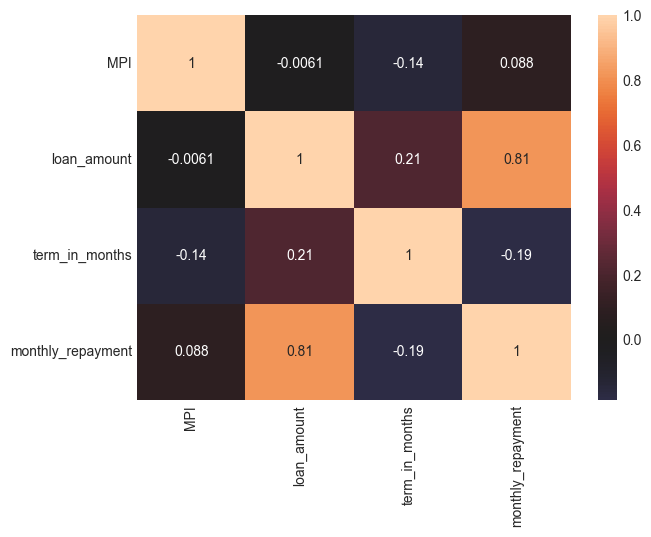

In [418]:
corr_m = df_corr[research_list].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_m, center=0, annot=True)
plt.show()

* Из графика выше видно, что корреляции между данными практически отсутствуют (за исключением очевидной зависимости суммы кредита от ежемесячной выплаты)
#### Подтвердим сделанный вывод на графиках зависимостей отобранных данных от MPI

Коэффициент корреляции -0.006114283241218948


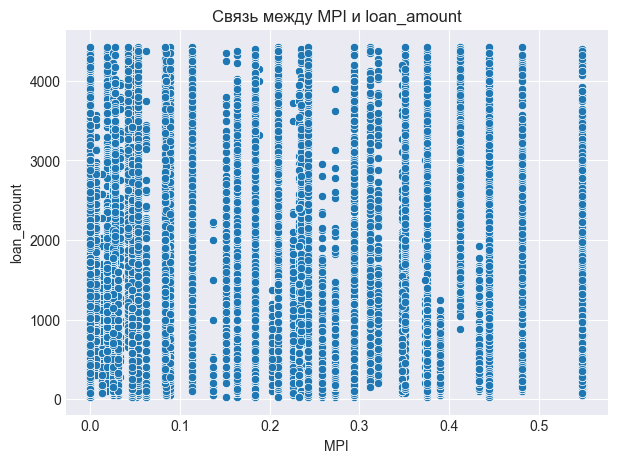

Коэффициент корреляции -0.1406225946029563


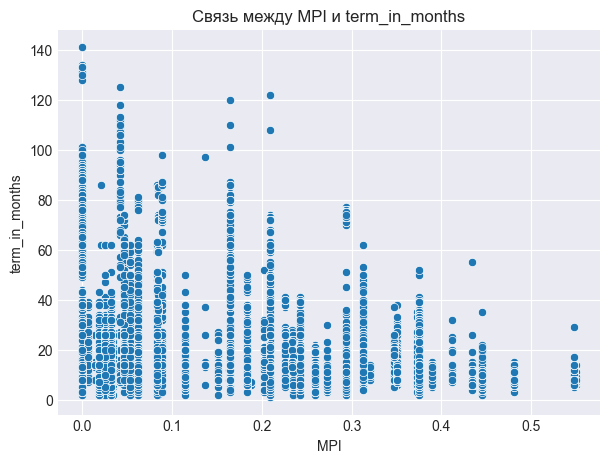

Коэффициент корреляции 0.08773873145661348


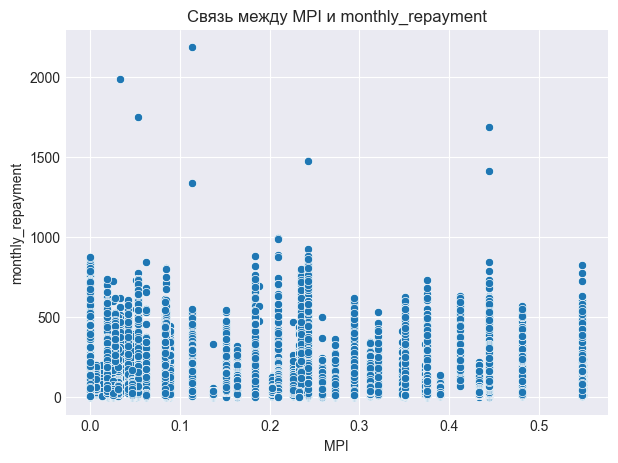

In [419]:
for i in research_list[1:]:

    curr_corr = df_corr[i].corr(df_corr.MPI)
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=df_corr.MPI, y=df_corr[i], data=df_corr)
    print('Коэффициент корреляции ' + str(curr_corr))
    plt.title('Связь между MPI и ' + str(i))
    plt.show()

* Связи между суммой займа и MPI нет
* Связь между MPI и временем погашения кредита по шкале Чеддока - обратная слабая
* Так же нет статистической связи между MPI  и суммой ежемесячного платежа

#### Выводы:

* Kiva играет важнейшую роль для многих стран в части поддержки хозяйственной деятельности, часто выступая в роли частного банковского сектора
* В каждый момент времени стоит оказывать адресную помощь странам и регионам, которые больше всего недофинансированы относительно других. Это страны с высоким уровнем бедности, в которых люди могут позволить себе выплачивать суммы значительно меньше, чем в других странах. Необходимо направить усилия сообщества KIva на поддержку самых нуждающихся. Такие заявки могут быть отражены в отдельных категориях (например: Неотложные нужды, Срочно и т.п.)
* Используя положительный опыт Филиппин, стоит стимулировать рост выдачи небольших по сумме и сроку погашения займов, которые обеспечат бОльшую занятость населения и рост деловой активности. По возможности стоит делить заявки из небогатых стран на небольшие и короткие займы
* Стоит стремиться к обеспечению доступа к финансированию для женщин и мужчин в равной степени и обратить внимание на те страны и регионы, где пока этот баланс нарушен. Например, для таких стран как Самоа, Либерия, Того, выводить на главную страницу сначала займы от мужчин. Отличным шагом станет публикация личных историй и примеров женщин и мужчин, например, в интернет-издательствах и блоггинг платформах
* Приоритетными должны становиться заявки, направленные на развитие отраслей с высокой добавленной стоимостью и стимулированием производств, так как они по цепочке начинают задействовать другие отрасли (Строительство, Производство, Легкая промышленность). Здесь очень кстати будет использование умных рекомендательных систем на сайте Kiva.org, которые с бОльшей вероятностью будут подсказывать такие заявки.
* Всё ещё довольна высока доля заявок, направленных на удовлетворение самых базовых человеческих потребностей. Такие просьбы должны быть первыми кандидатами на главной странице. Недопустимы такие ситуации, когда, например, в Нигерии люди ждут жизненно важную чистую воду по 10 дней. Дайджест таких заявок можно включать в регулярные почтовые рассылки всем участникам сообщества Kiva, когда-либо принимавшим участие в финансировании проектов
* Финансирование заявок на крупные суммы и долгосрочные проекты тоже работает. Для части стран возможность использовать Kiva будет играть решающую роль в формировании и реализации инфраструктурных и системообразующих проектов
* Для ряда регионов и стран присутствия, таких как Южная Азия и, в частности, Пакистан и Индия, есть отличные перспективы для расширения присутствия и деятельности со стороны сообщества Kiva
* Нередки случаи проявления неравенства между странами, таких как, например, длительные ожидания финансирования для части заявок с совсем небольшими суммами. В силах организаторов платформы Kiva и сообщества сглаживать такие явные неравенства, регулируя результаты поисковой выдачи